In [ ]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install stargazer

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
from linearmodels.panel import PanelOLS
from stargazer.stargazer import Stargazer
import zipfile

In [ ]:
upload = files.upload()
gdf = gpd.read_file('/content/cty_shp.gpkg')

Saving cty_shp.gpkg to cty_shp.gpkg


In [ ]:
gdf

NAME  RBZ  TYPE  \
0      OSTPRIGNITZ  POT     0   
1           RUPPIN  POT     0   
2    WESTHAVELLAND  POT     0   
3          TEMPLIN  POT     0   
4         PRENZLAU  POT     0   
..             ...  ...   ...   
338          POSEN  POS     0   
339      FRANKFURT  FRA     2   
340       DUISBURG  DUS     2   
341          ESSEN  DUS     2   
342  GLATZ-NEURODE  BRE     0   

                                              geometry  
0    MULTIPOLYGON (((322058.327 5910792.829, 322919...  
1    MULTIPOLYGON (((370187.020 5894707.263, 369618...  
2    MULTIPOLYGON (((351561.700 5815316.600, 351591...  
3    MULTIPOLYGON (((423206.900 5900285.900, 423692...  
4    MULTIPOLYGON (((444890.900 5930163.500, 445335...  
..                                                 ...  
338  MULTIPOLYGON (((643619.400 5821449.400, 643158...  
339  MULTIPOLYGON (((472209.900 5792967.100, 467743...  
340  MULTIPOLYGON (((-75363.996 5732933.709, -74573...  
341  MULTIPOLYGON (((-55220.800 5732668.848, -52508...  
342  MULTIPOLYGON (((612953.500 5607116.200, 613359...  

[343 rows x 4 columns]

In [ ]:
upload = files.upload()
df = pd.read_csv('/content/student dataset.csv')

Saving student dataset.csv to student dataset.csv


In [ ]:
df["match_type"] = df["match_type"].astype(object)
gdf['TYPE'] = gdf['TYPE'].astype(int)
merged_df = gdf.merge(df, left_on=["NAME", "RBZ", "TYPE"], right_on=["match_name", "match_rbz", "match_type"])
merged_df.head()

NAME  RBZ TYPE                                           geometry  \
0    OSTPRIGNITZ  POT    0  MULTIPOLYGON (((322058.327 5910792.829, 322919...   
1         RUPPIN  POT    0  MULTIPOLYGON (((370187.020 5894707.263, 369618...   
2  WESTHAVELLAND  POT    0  MULTIPOLYGON (((351561.700 5815316.600, 351591...   
3        TEMPLIN  POT    0  MULTIPOLYGON (((423206.900 5900285.900, 423692...   
4       PRENZLAU  POT    0  MULTIPOLYGON (((444890.900 5930163.500, 445335...   

    org_type        org_name     match_name match_type  \
0  Landkreis   Ost-Priegnitz    OSTPRIGNITZ          0   
1  Landkreis          Ruppin         RUPPIN          0   
2  Landkreis  West-Havelland  WESTHAVELLAND          0   
3  Landkreis         Templin        TEMPLIN          0   
4  Landkreis        Prenzlau       PRENZLAU          0   

                  org_rbz      org_prv  ... rkm_1845  rkm_1844  rkm_1843  \
0  Potsdam (excl. Berlin)  Brandenburg  ...      0.0       0.0       0.0   
1  Potsdam (excl. Berlin)  Brandenburg  ...      0.0       0.0       0.0   
2  Potsdam (excl. Berlin)  Brandenburg  ...      0.0       0.0       0.0   
3  Potsdam (excl. Berlin)  Brandenburg  ...      0.0       0.0       0.0   
4  Potsdam (excl. Berlin)  Brandenburg  ...      0.0       0.0       0.0   

   rkm_1842  rkm_1841  rkm_1840  rkm_1839  rkm_1838  rkm_1837       area  
0       0.0       0.0       0.0       0.0       0.0         0  1946.5865  
1       0.0       0.0       0.0       0.0       0.0         0  1785.1674  
2       0.0       0.0       0.0       0.0       0.0         0  1311.3241  
3       0.0       0.0       0.0       0.0       0.0         0  1467.6155  
4       0.0       0.0       0.0       0.0       0.0         0  1104.5825  

[5 rows x 91 columns]

In [ ]:
merged_df.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'match_name',
       'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'o_craft_1849',
       'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1821', 'p_1831', 'c_1831',
       'c_1832', 'c_1833', 'p_1837', 'c_1836', 'c_1837', 'p_1840', 'p_1843',
       'p_1846', 'c_1848', 'p_1849', 'c_1849', 'c_1850', 'c_1851', 'p_1852',
       'c_1852', 'c_1853', 'c_1854', 'p_1855', 'c_1855', 'c_1856', 'c_1857',
       'c_1858', 'c_1859', 'p_1861', 'p_1864', 'c_1866', 'p_1867', 'c_1867',
       'c_1868', 'p_1871', 'c_1873', 'c_1874', 'p_1875', 'rkm_1875',
       'rkm_1874', 'rkm_1873', 'rkm_1872', 'rkm_1871', 'rkm_1870', 'rkm_1869',
       'rkm_1868', 'rkm_1867', 'rkm_1866', 'rkm_1865', 'rkm_1864', 'rkm_1863',
       'rkm_1862', 'rkm_1861', 'rkm_1860', 'rkm_1859', 'rkm_1858', 'rkm_1857',
       'rkm_1856', 'rkm_1855', 'rkm_1854', 'rkm_1853', 'rkm_1852', 'rkm_1851',
       'rkm_1850', 'rkm_1849', 'rkm_1848', 'rkm_1847', 'rkm_1846', 'rkm_184

In [ ]:
columns_to_drop = [col for col in merged_df.columns if col.startswith("c")]
merged_df = merged_df.drop(columns=columns_to_drop)

In [ ]:
merged_df.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'match_name',
       'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'o_craft_1849',
       'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1821', 'p_1831', 'p_1837',
       'p_1840', 'p_1843', 'p_1846', 'p_1849', 'p_1852', 'p_1855', 'p_1861',
       'p_1864', 'p_1867', 'p_1871', 'p_1875', 'rkm_1875', 'rkm_1874',
       'rkm_1873', 'rkm_1872', 'rkm_1871', 'rkm_1870', 'rkm_1869', 'rkm_1868',
       'rkm_1867', 'rkm_1866', 'rkm_1865', 'rkm_1864', 'rkm_1863', 'rkm_1862',
       'rkm_1861', 'rkm_1860', 'rkm_1859', 'rkm_1858', 'rkm_1857', 'rkm_1856',
       'rkm_1855', 'rkm_1854', 'rkm_1853', 'rkm_1852', 'rkm_1851', 'rkm_1850',
       'rkm_1849', 'rkm_1848', 'rkm_1847', 'rkm_1846', 'rkm_1845', 'rkm_1844',
       'rkm_1843', 'rkm_1842', 'rkm_1841', 'rkm_1840', 'rkm_1839', 'rkm_1838',
       'rkm_1837', 'area'],
      dtype='object')

In [ ]:
columns_to_keep = ['rkm_1875', 'rkm_1849']
columns_to_remove = [col for col in merged_df.columns if col.startswith("r") and col not in columns_to_keep]

merged_df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
merged_df.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'match_name',
       'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'o_craft_1849',
       'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1821', 'p_1831', 'p_1837',
       'p_1840', 'p_1843', 'p_1846', 'p_1849', 'p_1852', 'p_1855', 'p_1861',
       'p_1864', 'p_1867', 'p_1871', 'p_1875', 'rkm_1875', 'rkm_1849', 'area'],
      dtype='object')

In [ ]:
columns_to_keep = ['p_1875', 'p_1849']
columns_to_remove = [col for col in merged_df.columns if col.startswith("p") and col not in columns_to_keep]

merged_df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
merged_df['o_agr_1849']

0      35045
1      22287
2      28262
3      16389
4      24026
       ...  
338    36206
339     6115
340    29581
341    29581
342    23652
Name: o_agr_1849, Length: 343, dtype: int64

In [ ]:
upload = files.upload()
agri_1882 = pd.read_csv('/content/ipehd_1882_occ_agri (1).csv')

Saving ipehd_1882_occ_agri (1).csv to ipehd_1882_occ_agri (1) (1).csv


In [ ]:
agri_1882

kreiskey1882        county   rb  occ1882_se_agr_pr  occ1882_emp_agr_pr  \
0               1         MEMEL  KON               2510                7909   
1               2   FISCHHAUSEN  KON               1086                9702   
2               3    KONIGSBERG  KON                118                 436   
3               4    KONIGSBERG  KON               1266               13052   
4               5        LABIAU  KON               3391               10445   
..            ...           ...  ...                ...                 ...   
459           460   SIGMARINGEN  SIG                 12                  89   
460           461  GAMMERTINGEN  SIG                 17                 102   
461           462     HECHINGEN  SIG                 12                  87   
462           463    HAIGERLOCH  SIG                  9                  54   
463           464        BERLIN  BER                705                2698   

     occ1882_se_for_pr  occ1882_emp_for_pr  occ1882_se_agr_cat  \
0                  342                 539                  35   
1                  408                 692                   2   
2                   14                  13                   3   
3                  119                 267                   8   
4                  153                 467                   1   
..                 ...                 ...                 ...   
459                  1                   4                1671   
460                  0                   0                1783   
461                  0                   0                2863   
462                  0                   0                1759   
463                 41                  60                  36   

     occ1882_emp_agr_cat  occ1882_se_for_cat  occ1882_emp_for_cat  \
0                    379                   4                    4   
1                     20                   1                    3   
2                      8                   0                    0   
3                    126                   0                    0   
4                     19                   2                    3   
..                   ...                 ...                  ...   
459                 3219                  11                   53   
460                 1787                   4                   16   
461                 2539                   1                   20   
462                 1574                   1                    9   
463                  226                   2                    7   

     occ1882_se_agr_jew  occ1882_emp_agr_jew  occ1882_se_for_jew  \
0                     6                    9                   0   
1                     2                    1                   0   
2                     2                    3                   0   
3                     6                    1                   0   
4                     0                    4                   0   
..                  ...                  ...                 ...   
459                   1                    0                   0   
460                   0                    0                   0   
461                   2                    0                   0   
462                   3                    0                   0   
463                   7                    4                   0   

     occ1882_emp_for_jew  occ1882_se_agr_tot  occ1882_emp_agr_tot  \
0                      3                2559                 8302   
1                      0                1092                 9733   
2                      0                 126                  447   
3                      0                1284                13189   
4                      0                3404                10485   
..                   ...                 ...                  ...   
459                    0                1684                 3308   
460                    0                1800                 1889

In [ ]:
# Assuming agri_1882 is your DataFrame
columns_to_sum = ["occ1882_se_agr_tot", "occ1882_emp_agr_tot", "occ1882_se_for_tot", "occ1882_emp_for_tot"]

agri_1882['o_agr_1882'] = agri_1882[columns_to_sum].sum(axis=1)

In [ ]:
agri_1882

kreiskey1882        county   rb  occ1882_se_agr_pr  occ1882_emp_agr_pr  \
0               1         MEMEL  KON               2510                7909   
1               2   FISCHHAUSEN  KON               1086                9702   
2               3    KONIGSBERG  KON                118                 436   
3               4    KONIGSBERG  KON               1266               13052   
4               5        LABIAU  KON               3391               10445   
..            ...           ...  ...                ...                 ...   
459           460   SIGMARINGEN  SIG                 12                  89   
460           461  GAMMERTINGEN  SIG                 17                 102   
461           462     HECHINGEN  SIG                 12                  87   
462           463    HAIGERLOCH  SIG                  9                  54   
463           464        BERLIN  BER                705                2698   

     occ1882_se_for_pr  occ1882_emp_for_pr  occ1882_se_agr_cat  \
0                  342                 539                  35   
1                  408                 692                   2   
2                   14                  13                   3   
3                  119                 267                   8   
4                  153                 467                   1   
..                 ...                 ...                 ...   
459                  1                   4                1671   
460                  0                   0                1783   
461                  0                   0                2863   
462                  0                   0                1759   
463                 41                  60                  36   

     occ1882_emp_agr_cat  occ1882_se_for_cat  occ1882_emp_for_cat  \
0                    379                   4                    4   
1                     20                   1                    3   
2                      8                   0                    0   
3                    126                   0                    0   
4                     19                   2                    3   
..                   ...                 ...                  ...   
459                 3219                  11                   53   
460                 1787                   4                   16   
461                 2539                   1                   20   
462                 1574                   1                    9   
463                  226                   2                    7   

     occ1882_se_agr_jew  occ1882_emp_agr_jew  occ1882_se_for_jew  \
0                     6                    9                   0   
1                     2                    1                   0   
2                     2                    3                   0   
3                     6                    1                   0   
4                     0                    4                   0   
..                  ...                  ...                 ...   
459                   1                    0                   0   
460                   0                    0                   0   
461                   2                    0                   0   
462                   3                    0                   0   
463                   7                    4                   0   

     occ1882_emp_for_jew  occ1882_se_agr_tot  occ1882_emp_agr_tot  \
0                      3                2559                 8302   
1                      0                1092                 9733   
2                      0                 126                  447   
3                      0                1284                13189   
4                      0                3404                10485   
..                   ...                 ...                  ...   
459                    0                1684                 3308   
460                    0                1800                 1889

In [ ]:
columns_to_keep = ["county", "rb", "o_agr_1882"]
agri_1882 = agri_1882[columns_to_keep]

In [ ]:
agri_1882

In [ ]:
merged_df = merged_df.merge(agri_1882, left_on=["NAME", "RBZ"], right_on=["county", "rb"])


NAME  RBZ TYPE  \
0      OSTPRIGNITZ  POT    0   
1           RUPPIN  POT    0   
2    WESTHAVELLAND  POT    0   
3          TEMPLIN  POT    0   
4         PRENZLAU  POT    0   
..             ...  ...  ...   
416          POSEN  POS    0   
417          POSEN  POS    0   
418          POSEN  POS    0   
419      FRANKFURT  FRA    2   
420       DUISBURG  DUS    2   

                                              geometry    org_type  \
0    MULTIPOLYGON (((322058.327 5910792.829, 322919...   Landkreis   
1    MULTIPOLYGON (((370187.020 5894707.263, 369618...   Landkreis   
2    MULTIPOLYGON (((351561.700 5815316.600, 351591...   Landkreis   
3    MULTIPOLYGON (((423206.900 5900285.900, 423692...   Landkreis   
4    MULTIPOLYGON (((444890.900 5930163.500, 445335...   Landkreis   
..                                                 ...         ...   
416  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
417  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
418  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
419  MULTIPOLYGON (((472209.900 5792967.100, 467743...  Stadtkreis   
420  MULTIPOLYGON (((-75363.996 5732933.709, -74573...  Stadtkreis   

              org_name     match_name match_type                 org_rbz  \
0        Ost-Priegnitz    OSTPRIGNITZ          0  Potsdam (excl. Berlin)   
1               Ruppin         RUPPIN          0  Potsdam (excl. Berlin)   
2       West-Havelland  WESTHAVELLAND          0  Potsdam (excl. Berlin)   
3              Templin        TEMPLIN          0  Potsdam (excl. Berlin)   
4             Prenzlau       PRENZLAU          0  Potsdam (excl. Berlin)   
..                 ...            ...        ...                     ...   
416  Posen incl. Stadt          POSEN          0                   Posen   
417  Posen incl. Stadt          POSEN          0                   Posen   
418  Posen incl. Stadt          POSEN          0                   Posen   
419    Frankfurt a. O.      FRANKFURT          2               Frankfurt   
420           Duisburg       DUISBURG          2              Düsseldorf   

         org_prv  ...  p_1875   rkm_1875   rkm_1849         area  \
0    Brandenburg  ...   66660  17.400000  17.400000  1946.586500   
1    Brandenburg  ...   73568  17.320000  17.320000  1785.167400   
2    Brandenburg  ...   76225  65.230003  31.340000  1311.324100   
3    Brandenburg  ...   43891   1.050000   0.000000  1467.615500   
4    Brandenburg  ...   52678  55.660000   0.000000  1104.582500   
..           ...  ...     ...        ...        ...          ...   
416        Posen  ...  115373  87.449997  22.450001  1121.384000   
417        Posen  ...  115373  87.449997  22.450001  1121.384000   
418        Posen  ...  115373  87.449997  22.450001  1121.384000   
419  Brandenburg  ...   44318   8.200000   8.200000    71.989998   
420    Rheinland  ...   37375   6.500000   6.500000    33.988003   

          county_x  rb_x  o_agr_1882_x       county_y  rb_y  o_agr_1882_y  
0      OSTPRIGNITZ   POT         16097    OSTPRIGNITZ   POT         16097  
1           RUPPIN   POT         15476         RUPPIN   POT         15476  
2    WESTHAVELLAND   POT         10626  WESTHAVELLAND   POT         10626  
3          TEMPLIN   POT          9418        TEMPLIN   POT          9418  
4         PRENZLAU   POT         12637       PRENZLAU   POT         12637  
..             ...   ...           ...            ...   ...           ...  
416          POSEN   POS           361          POSEN   POS         16955  
417          POSEN   POS         16955          POSEN   POS           361  
418          POSEN   POS         16955          POSEN   POS         16955  
419      FRANKFURT   FRA          1142      FRANKFURT   FRA          1142  
420       DUISBURG   DUS           463       DUISBURG   DUS           463  

[421 rows x 26 columns]

In [ ]:
merged_df.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'match_name',
       'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'o_craft_1849',
       'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1849', 'p_1875',
       'rkm_1875', 'rkm_1849', 'area', 'county_x', 'rb_x', 'o_agr_1882_x',
       'county_y', 'rb_y', 'o_agr_1882_y'],
      dtype='object')

In [ ]:
columns_to_keep = ['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'org_rbz', 'org_prv',
                   'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1849', 'p_1875', 'rkm_1875',
                   'rkm_1849', 'area', 'o_agr_1882_x']
merged_df = merged_df[columns_to_keep]
merged_df.rename(columns={'o_agr_1882_x': 'o_agr_1882'}, inplace=True)

<ipython-input-29-0fd2b6ca0af4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns={'o_agr_1882_x': 'o_agr_1882'}, inplace=True)


In [ ]:
merged_df

NAME  RBZ TYPE  \
0      OSTPRIGNITZ  POT    0   
1           RUPPIN  POT    0   
2    WESTHAVELLAND  POT    0   
3          TEMPLIN  POT    0   
4         PRENZLAU  POT    0   
..             ...  ...  ...   
416          POSEN  POS    0   
417          POSEN  POS    0   
418          POSEN  POS    0   
419      FRANKFURT  FRA    2   
420       DUISBURG  DUS    2   

                                              geometry    org_type  \
0    MULTIPOLYGON (((322058.327 5910792.829, 322919...   Landkreis   
1    MULTIPOLYGON (((370187.020 5894707.263, 369618...   Landkreis   
2    MULTIPOLYGON (((351561.700 5815316.600, 351591...   Landkreis   
3    MULTIPOLYGON (((423206.900 5900285.900, 423692...   Landkreis   
4    MULTIPOLYGON (((444890.900 5930163.500, 445335...   Landkreis   
..                                                 ...         ...   
416  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
417  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
418  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
419  MULTIPOLYGON (((472209.900 5792967.100, 467743...  Stadtkreis   
420  MULTIPOLYGON (((-75363.996 5732933.709, -74573...  Stadtkreis   

              org_name                 org_rbz      org_prv  o_ind_1849  \
0        Ost-Priegnitz  Potsdam (excl. Berlin)  Brandenburg        1052   
1               Ruppin  Potsdam (excl. Berlin)  Brandenburg        1579   
2       West-Havelland  Potsdam (excl. Berlin)  Brandenburg        4520   
3              Templin  Potsdam (excl. Berlin)  Brandenburg         677   
4             Prenzlau  Potsdam (excl. Berlin)  Brandenburg         683   
..                 ...                     ...          ...         ...   
416  Posen incl. Stadt                   Posen        Posen         838   
417  Posen incl. Stadt                   Posen        Posen         838   
418  Posen incl. Stadt                   Posen        Posen         838   
419    Frankfurt a. O.               Frankfurt  Brandenburg         713   
420           Duisburg              Düsseldorf    Rheinland        6710   

     o_serv_1849  o_agr_1849   p_1849  p_1875   rkm_1875   rkm_1849  \
0           5046       35045  63475.0   66660  17.400000  17.400000   
1           7864       22287  68778.0   73568  17.320000  17.320000   
2           9834       28262  55215.0   76225  65.230003  31.340000   
3           7033       16389  43625.0   43891   1.050000   0.000000   
4           5439       24026  53001.0   52678  55.660000   0.000000   
..           ...         ...      ...     ...        ...        ...   
416        12992       36206  83454.0  115373  87.449997  22.450001   
417        12992       36206  83454.0  115373  87.449997  22.450001   
418        12992       36206  83454.0  115373  87.449997  22.450001   
419        10215        6115  28460.0   44318   8.200000   8.200000   
420        12498       29581   8934.0   37375   6.500000   6.500000   

            area  o_agr_1882  
0    1946.586500       16097  
1    1785.167400       15476  
2    1311.324100       10626  
3    1467.615500        9418  
4    1104.582500       12637  
..           ...         ...  
416  1121.384000         361  
417  1121.384000       16955  
418  1121.384000       16955  
419    71.989998        1142  
420    33.988003         463  

[421 rows x 17 columns]

In [ ]:
upload = files.upload()
ind_1882 = pd.read_csv('/content/ipehd_1882_occ_indu.csv')

Saving ipehd_1882_occ_indu.csv to ipehd_1882_occ_indu.csv


In [ ]:
ind_1882.columns

Index(['kreiskey1882', 'county', 'rb', 'occ1882_se_min_pr',
       'occ1882_emp_min_pr', 'occ1882_se_sto_pr', 'occ1882_emp_sto_pr',
       'occ1882_se_met_pr', 'occ1882_emp_met_pr', 'occ1882_se_eng_pr',
       ...
       'occ1882_se_foo_tot', 'occ1882_emp_foo_tot', 'occ1882_se_clo_tot',
       'occ1882_emp_clo_tot', 'occ1882_se_bui_tot', 'occ1882_emp_bui_tot',
       'occ1882_se_pri_tot', 'occ1882_emp_pri_tot', 'occ1882_se_art_tot',
       'occ1882_emp_art_tot'],
      dtype='object', length=115)

In [ ]:
columns_to_sum = [col for col in ind_1882.columns if col.endswith("_tot")]
ind_1882['o_ind_1882'] = ind_1882[columns_to_sum].sum(axis=1)

In [ ]:
ind_1882

kreiskey1882        county   rb  occ1882_se_min_pr  occ1882_emp_min_pr  \
0               1         MEMEL  KON                  2                 658   
1               2   FISCHHAUSEN  KON                  3                 493   
2               3    KONIGSBERG  KON                  1                  30   
3               4    KONIGSBERG  KON                  0                  23   
4               5        LABIAU  KON                  0                   0   
..            ...           ...  ...                ...                 ...   
459           460   SIGMARINGEN  SIG                  0                   1   
460           461  GAMMERTINGEN  SIG                  0                   0   
461           462     HECHINGEN  SIG                  0                   0   
462           463    HAIGERLOCH  SIG                  0                   2   
463           464        BERLIN  BER                 29                 207   

     occ1882_se_sto_pr  occ1882_emp_sto_pr  occ1882_se_met_pr  \
0                   25                  78                110   
1                   17                  71                133   
2                   49                 287                295   
3                   15                 212                105   
4                   15                  54                103   
..                 ...                 ...                ...   
459                  3                  20                  4   
460                  2                   3                  1   
461                  2                   9                  2   
462                  0                   0                  2   
463                536                2964               3356   

     occ1882_emp_met_pr  occ1882_se_eng_pr  ...  occ1882_emp_foo_tot  \
0                   274                 42  ...                  307   
1                   186                 94  ...                  233   
2                  1641                162  ...                 1915   
3                   119                 57  ...                  525   
4                   126                 52  ...                  200   
..                  ...                ...  ...                  ...   
459                   9                  0  ...                  216   
460                   3                  0  ...                   98   
461                   4                  3  ...                   93   
462                   3                  1  ...                   62   
463               23873               1915  ...                16410   

     occ1882_se_clo_tot  occ1882_emp_clo_tot  occ1882_se_bui_tot  \
0                  1060                  442                  75   
1                   618                  212                  62   
2                  5146                 2744                 372   
3                   471                  139                  32   
4                   554                  309                  47   
..                  ...                  ...                 ...   
459                 484                  140                 163   
460                 272                   81                 122   
461                 422                  160                  81   
462                 214                   69                  38   
463               54717                40464                4008   

     occ1882_emp_bui_tot  occ1882_se_pri_tot  occ1882_emp_pri_tot  \
0                    635                   9                   30   
1                    903                   2                    4   
2                   2963                  48                  316   
3                   1050                   0                    0   
4                    539                   2                    4   
..                   ...                 ...                  ...   
459                  347                   7                   14   
460                  125                 

In [ ]:
columns_to_keep = ["county", "rb", "o_ind_1882"]
ind_1882 = ind_1882[columns_to_keep]

In [ ]:
ind_1882

county   rb  o_ind_1882
0           MEMEL  KON        5097
1     FISCHHAUSEN  KON        3750
2      KONIGSBERG  KON       20883
3      KONIGSBERG  KON        3346
4          LABIAU  KON        2646
..            ...  ...         ...
459   SIGMARINGEN  SIG        2459
460  GAMMERTINGEN  SIG        1495
461     HECHINGEN  SIG        1677
462    HAIGERLOCH  SIG         928
463        BERLIN  BER      286656

[464 rows x 3 columns]

In [ ]:
merged_df = merged_df.merge(ind_1882, left_on=["NAME", "RBZ"], right_on=["county", "rb"])

In [ ]:
merged_df

NAME  RBZ TYPE  \
0      OSTPRIGNITZ  POT    0   
1           RUPPIN  POT    0   
2    WESTHAVELLAND  POT    0   
3          TEMPLIN  POT    0   
4         PRENZLAU  POT    0   
..             ...  ...  ...   
528          POSEN  POS    0   
529          POSEN  POS    0   
530          POSEN  POS    0   
531      FRANKFURT  FRA    2   
532       DUISBURG  DUS    2   

                                              geometry    org_type  \
0    MULTIPOLYGON (((322058.327 5910792.829, 322919...   Landkreis   
1    MULTIPOLYGON (((370187.020 5894707.263, 369618...   Landkreis   
2    MULTIPOLYGON (((351561.700 5815316.600, 351591...   Landkreis   
3    MULTIPOLYGON (((423206.900 5900285.900, 423692...   Landkreis   
4    MULTIPOLYGON (((444890.900 5930163.500, 445335...   Landkreis   
..                                                 ...         ...   
528  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
529  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
530  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
531  MULTIPOLYGON (((472209.900 5792967.100, 467743...  Stadtkreis   
532  MULTIPOLYGON (((-75363.996 5732933.709, -74573...  Stadtkreis   

              org_name                 org_rbz      org_prv  o_ind_1849  \
0        Ost-Priegnitz  Potsdam (excl. Berlin)  Brandenburg        1052   
1               Ruppin  Potsdam (excl. Berlin)  Brandenburg        1579   
2       West-Havelland  Potsdam (excl. Berlin)  Brandenburg        4520   
3              Templin  Potsdam (excl. Berlin)  Brandenburg         677   
4             Prenzlau  Potsdam (excl. Berlin)  Brandenburg         683   
..                 ...                     ...          ...         ...   
528  Posen incl. Stadt                   Posen        Posen         838   
529  Posen incl. Stadt                   Posen        Posen         838   
530  Posen incl. Stadt                   Posen        Posen         838   
531    Frankfurt a. O.               Frankfurt  Brandenburg         713   
532           Duisburg              Düsseldorf    Rheinland        6710   

     o_serv_1849  o_agr_1849   p_1849  p_1875   rkm_1875   rkm_1849  \
0           5046       35045  63475.0   66660  17.400000  17.400000   
1           7864       22287  68778.0   73568  17.320000  17.320000   
2           9834       28262  55215.0   76225  65.230003  31.340000   
3           7033       16389  43625.0   43891   1.050000   0.000000   
4           5439       24026  53001.0   52678  55.660000   0.000000   
..           ...         ...      ...     ...        ...        ...   
528        12992       36206  83454.0  115373  87.449997  22.450001   
529        12992       36206  83454.0  115373  87.449997  22.450001   
530        12992       36206  83454.0  115373  87.449997  22.450001   
531        10215        6115  28460.0   44318   8.200000   8.200000   
532        12498       29581   8934.0   37375   6.500000   6.500000   

            area  o_agr_1882         county   rb  o_ind_1882  
0    1946.586500       16097    OSTPRIGNITZ  POT        6349  
1    1785.167400       15476         RUPPIN  POT        8236  
2    1311.324100       10626  WESTHAVELLAND  POT        8221  
3    1467.615500        9418        TEMPLIN  POT        3674  
4    1104.582500       12637       PRENZLAU  POT        5596  
..           ...         ...            ...  ...         ...  
528  1121.384000       16955          POSEN  POS        4432  
529  1121.384000       16955          POSEN  POS       10928  
530  1121.384000       16955          POSEN  POS        4432  
531    71.989998        1142      FRANKFURT  FRA        8437  
532    33.988003         463       DUISBURG  DUS        8261  

[533 rows x 20 columns]

In [ ]:
upload = files.upload()
serv_1882 = pd.read_csv('/content/ipehd_1882_occ_serv (1).csv')

Saving ipehd_1882_occ_serv (1).csv to ipehd_1882_occ_serv (1).csv


In [ ]:
serv_1882

kreiskey1882        county   rb  occ1882_se_trg_pr  occ1882_emp_trg_pr  \
0               1         MEMEL  KON                438                 937   
1               2   FISCHHAUSEN  KON                172                 193   
2               3    KONIGSBERG  KON               1681                3223   
3               4    KONIGSBERG  KON                123                  98   
4               5        LABIAU  KON                162                 163   
..            ...           ...  ...                ...                 ...   
459           460   SIGMARINGEN  SIG                  2                   4   
460           461  GAMMERTINGEN  SIG                  1                   2   
461           462     HECHINGEN  SIG                  9                  13   
462           463    HAIGERLOCH  SIG                  1                   1   
463           464        BERLIN  BER              17205               23593   

     occ1882_se_fin_pr  occ1882_emp_fin_pr  occ1882_se_btr_pr  \
0                    7                   3                  7   
1                    0                   0                  2   
2                    5                 111                 45   
3                    0                   0                  2   
4                    0                   1                  2   
..                 ...                 ...                ...   
459                  0                   0                  0   
460                  0                   0                  0   
461                  0                   0                  1   
462                  0                   0                  0   
463                349                3690                713   

     occ1882_emp_btr_pr  occ1882_se_otr_pr  ...  occ1882_mai_tot  \
0                     6                 46  ...             1353   
1                     0                 13  ...              555   
2                    62                329  ...            11049   
3                     0                  9  ...              153   
4                     2                 12  ...              247   
..                  ...                ...  ...              ...   
459                   0                  3  ...               83   
460                   0                  0  ...               19   
461                   1                  1  ...               38   
462                   0                  0  ...               75   
463                1619               2987  ...            22214   

     occ1882_se_arm_tot  occ1882_emp_arm_tot  occ1882_se_jud_tot  \
0                    25                  645                  32   
1                    20                  585                  12   
2                   294                 6240                 317   
3                    12                  735                   7   
4                     0                    1                  11   
..                  ...                  ...                 ...   
459                   3                    4                  41   
460                   0                    0                   8   
461                   3                  127                  30   
462                   0                    0                  10   
463                1841                16048                2246   

     occ1882_emp_jud_tot  occ1882_se_rel_tot  occ1882_emp_rel_tot  \
0                    238                 221                   10   
1                    121                 193                   12   
2                   1197                 944                   73   
3                     78                 193                   17   
4                    105                 154                    8   
..                   ...                 ...                  ...   
459                  213                 120                   17   
460                   37                  49                    4   
461                 

In [ ]:
columns_to_sum = [col for col in serv_1882.columns if col.endswith("_tot")]
serv_1882['o_serv_1882'] = serv_1882[columns_to_sum].sum(axis=1)
columns_to_keep = ["county", "rb", "o_serv_1882"]
serv_1882 = serv_1882[columns_to_keep]

In [ ]:
merged_df = merged_df.merge(serv_1882, left_on=["NAME", "RBZ"], right_on=["county", "rb"])

In [ ]:
merged_df.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'org_rbz',
       'org_prv', 'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1849',
       'p_1875', 'rkm_1875', 'rkm_1849', 'area', 'o_agr_1882', 'county_x',
       'rb_x', 'o_ind_1882', 'county_y', 'rb_y', 'o_serv_1882'],
      dtype='object')

In [ ]:
columns_to_keep = ['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'org_rbz', 'org_prv',
                   'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1849', 'p_1875', 'rkm_1875',
                   'rkm_1849', 'area', 'o_agr_1882', 'o_serv_1882', 'o_ind_1882']
merged_df = merged_df[columns_to_keep]

In [ ]:
merged_df

NAME  RBZ TYPE  \
0      OSTPRIGNITZ  POT    0   
1           RUPPIN  POT    0   
2    WESTHAVELLAND  POT    0   
3          TEMPLIN  POT    0   
4         PRENZLAU  POT    0   
..             ...  ...  ...   
752          POSEN  POS    0   
753          POSEN  POS    0   
754          POSEN  POS    0   
755      FRANKFURT  FRA    2   
756       DUISBURG  DUS    2   

                                              geometry    org_type  \
0    MULTIPOLYGON (((322058.327 5910792.829, 322919...   Landkreis   
1    MULTIPOLYGON (((370187.020 5894707.263, 369618...   Landkreis   
2    MULTIPOLYGON (((351561.700 5815316.600, 351591...   Landkreis   
3    MULTIPOLYGON (((423206.900 5900285.900, 423692...   Landkreis   
4    MULTIPOLYGON (((444890.900 5930163.500, 445335...   Landkreis   
..                                                 ...         ...   
752  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
753  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
754  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
755  MULTIPOLYGON (((472209.900 5792967.100, 467743...  Stadtkreis   
756  MULTIPOLYGON (((-75363.996 5732933.709, -74573...  Stadtkreis   

              org_name                 org_rbz      org_prv  o_ind_1849  \
0        Ost-Priegnitz  Potsdam (excl. Berlin)  Brandenburg        1052   
1               Ruppin  Potsdam (excl. Berlin)  Brandenburg        1579   
2       West-Havelland  Potsdam (excl. Berlin)  Brandenburg        4520   
3              Templin  Potsdam (excl. Berlin)  Brandenburg         677   
4             Prenzlau  Potsdam (excl. Berlin)  Brandenburg         683   
..                 ...                     ...          ...         ...   
752  Posen incl. Stadt                   Posen        Posen         838   
753  Posen incl. Stadt                   Posen        Posen         838   
754  Posen incl. Stadt                   Posen        Posen         838   
755    Frankfurt a. O.               Frankfurt  Brandenburg         713   
756           Duisburg              Düsseldorf    Rheinland        6710   

     o_serv_1849  o_agr_1849   p_1849  p_1875   rkm_1875   rkm_1849  \
0           5046       35045  63475.0   66660  17.400000  17.400000   
1           7864       22287  68778.0   73568  17.320000  17.320000   
2           9834       28262  55215.0   76225  65.230003  31.340000   
3           7033       16389  43625.0   43891   1.050000   0.000000   
4           5439       24026  53001.0   52678  55.660000   0.000000   
..           ...         ...      ...     ...        ...        ...   
752        12992       36206  83454.0  115373  87.449997  22.450001   
753        12992       36206  83454.0  115373  87.449997  22.450001   
754        12992       36206  83454.0  115373  87.449997  22.450001   
755        10215        6115  28460.0   44318   8.200000   8.200000   
756        12498       29581   8934.0   37375   6.500000   6.500000   

            area  o_agr_1882  o_serv_1882  o_ind_1882  
0    1946.586500       16097         2522        6349  
1    1785.167400       15476         5394        8236  
2    1311.324100       10626         3686        8221  
3    1467.615500        9418         3149        3674  
4    1104.582500       12637         3994        5596  
..           ...         ...          ...         ...  
752  1121.384000       16955         1721       10928  
753  1121.384000       16955        14056        4432  
754  1121.384000       16955         1721        4432  
755    71.989998        1142        10365        8437  
756    33.988003         463         3900        8261  

[757 rows x 19 columns]

In [ ]:
columns_to_check = ['o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1849', 'p_1875', 'rkm_1875',
                    'rkm_1849', 'area', 'o_agr_1882', 'o_serv_1882', 'o_ind_1882']

cleaned = merged_df.dropna(subset=columns_to_check)

In [ ]:
cleaned

NAME  RBZ TYPE  \
0      OSTPRIGNITZ  POT    0   
1           RUPPIN  POT    0   
2    WESTHAVELLAND  POT    0   
3          TEMPLIN  POT    0   
4         PRENZLAU  POT    0   
..             ...  ...  ...   
752          POSEN  POS    0   
753          POSEN  POS    0   
754          POSEN  POS    0   
755      FRANKFURT  FRA    2   
756       DUISBURG  DUS    2   

                                              geometry    org_type  \
0    MULTIPOLYGON (((322058.327 5910792.829, 322919...   Landkreis   
1    MULTIPOLYGON (((370187.020 5894707.263, 369618...   Landkreis   
2    MULTIPOLYGON (((351561.700 5815316.600, 351591...   Landkreis   
3    MULTIPOLYGON (((423206.900 5900285.900, 423692...   Landkreis   
4    MULTIPOLYGON (((444890.900 5930163.500, 445335...   Landkreis   
..                                                 ...         ...   
752  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
753  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
754  MULTIPOLYGON (((643619.400 5821449.400, 643158...   Landkreis   
755  MULTIPOLYGON (((472209.900 5792967.100, 467743...  Stadtkreis   
756  MULTIPOLYGON (((-75363.996 5732933.709, -74573...  Stadtkreis   

              org_name                 org_rbz      org_prv  o_ind_1849  \
0        Ost-Priegnitz  Potsdam (excl. Berlin)  Brandenburg        1052   
1               Ruppin  Potsdam (excl. Berlin)  Brandenburg        1579   
2       West-Havelland  Potsdam (excl. Berlin)  Brandenburg        4520   
3              Templin  Potsdam (excl. Berlin)  Brandenburg         677   
4             Prenzlau  Potsdam (excl. Berlin)  Brandenburg         683   
..                 ...                     ...          ...         ...   
752  Posen incl. Stadt                   Posen        Posen         838   
753  Posen incl. Stadt                   Posen        Posen         838   
754  Posen incl. Stadt                   Posen        Posen         838   
755    Frankfurt a. O.               Frankfurt  Brandenburg         713   
756           Duisburg              Düsseldorf    Rheinland        6710   

     o_serv_1849  o_agr_1849   p_1849  p_1875   rkm_1875   rkm_1849  \
0           5046       35045  63475.0   66660  17.400000  17.400000   
1           7864       22287  68778.0   73568  17.320000  17.320000   
2           9834       28262  55215.0   76225  65.230003  31.340000   
3           7033       16389  43625.0   43891   1.050000   0.000000   
4           5439       24026  53001.0   52678  55.660000   0.000000   
..           ...         ...      ...     ...        ...        ...   
752        12992       36206  83454.0  115373  87.449997  22.450001   
753        12992       36206  83454.0  115373  87.449997  22.450001   
754        12992       36206  83454.0  115373  87.449997  22.450001   
755        10215        6115  28460.0   44318   8.200000   8.200000   
756        12498       29581   8934.0   37375   6.500000   6.500000   

            area  o_agr_1882  o_serv_1882  o_ind_1882  
0    1946.586500       16097         2522        6349  
1    1785.167400       15476         5394        8236  
2    1311.324100       10626         3686        8221  
3    1467.615500        9418         3149        3674  
4    1104.582500       12637         3994        5596  
..           ...         ...          ...         ...  
752  1121.384000       16955         1721       10928  
753  1121.384000       16955        14056        4432  
754  1121.384000       16955         1721        4432  
755    71.989998        1142        10365        8437  
756    33.988003         463         3900        8261  

[757 rows x 19 columns]

In [ ]:
cleaned.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cleaned['ind_growth'] = np.log(cleaned['o_ind_1882'] / cleaned['p_1875']) - np.log(cleaned['o_ind_1849'] / cleaned['p_1849'])

In [ ]:
cleaned['agr_growth'] = np.log(cleaned['o_agr_1882'] / cleaned['p_1875']) - np.log(cleaned['o_agr_1849'] / cleaned['p_1849'])

In [ ]:
cleaned['serv_growth'] = np.log(cleaned['o_serv_1882'] / cleaned['p_1875']) - np.log(cleaned['o_serv_1849'] / cleaned['p_1849'])

In [ ]:
cleaned['rkm_growth'] = np.log(cleaned['rkm_1875']) - np.log(cleaned['rkm_1849'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
cleaned['rkm_growth']

0      0.000000
1      0.000000
2      0.733024
3           inf
4           inf
         ...   
752    1.359777
753    1.359777
754    1.359777
755    0.000000
756    0.000000
Name: rkm_growth, Length: 757, dtype: float64

In [ ]:
# Assuming cleaned is your DataFrame
cleaned = cleaned[np.isfinite(cleaned['rkm_growth']) & (cleaned['rkm_growth'] != 0)]

In [ ]:
cleaned

NAME  RBZ TYPE  \
2    WESTHAVELLAND  POT    0   
13    OSTHAVELLAND  POT    0   
14    NIEDERBARNIM  POT    0   
17          TELTOW  POT    0   
24           SORAU  FRA    0   
..             ...  ...  ...   
750          POSEN  POS    0   
751          POSEN  POS    0   
752          POSEN  POS    0   
753          POSEN  POS    0   
754          POSEN  POS    0   

                                              geometry   org_type  \
2    MULTIPOLYGON (((351561.700 5815316.600, 351591...  Landkreis   
13   MULTIPOLYGON (((377651.200 5851440.800, 378426...  Landkreis   
14   MULTIPOLYGON (((411414.600 5859324.700, 410160...  Landkreis   
17   MULTIPOLYGON (((385324.200 5822799.500, 384908...  Landkreis   
24   MULTIPOLYGON (((513729.200 5745046.600, 513310...  Landkreis   
..                                                 ...        ...   
750  MULTIPOLYGON (((643619.400 5821449.400, 643158...  Landkreis   
751  MULTIPOLYGON (((643619.400 5821449.400, 643158...  Landkreis   
752  MULTIPOLYGON (((643619.400 5821449.400, 643158...  Landkreis   
753  MULTIPOLYGON (((643619.400 5821449.400, 643158...  Landkreis   
754  MULTIPOLYGON (((643619.400 5821449.400, 643158...  Landkreis   

              org_name                 org_rbz      org_prv  o_ind_1849  \
2       West-Havelland  Potsdam (excl. Berlin)  Brandenburg        4520   
13       Ost-Havelland  Potsdam (excl. Berlin)  Brandenburg        1124   
14       Nieder-Barnim  Potsdam (excl. Berlin)  Brandenburg        2208   
17              Teltow  Potsdam (excl. Berlin)  Brandenburg        1731   
24               Sorau               Frankfurt  Brandenburg        3588   
..                 ...                     ...          ...         ...   
750  Posen incl. Stadt                   Posen        Posen         838   
751  Posen incl. Stadt                   Posen        Posen         838   
752  Posen incl. Stadt                   Posen        Posen         838   
753  Posen incl. Stadt                   Posen        Posen         838   
754  Posen incl. Stadt                   Posen        Posen         838   

     o_serv_1849  ...    rkm_1875   rkm_1849       area  o_agr_1882  \
2           9834  ...   65.230003  31.340000  1311.3241       10626   
13          8271  ...   66.209999  37.509998  1213.4274       13230   
14         10971  ...   95.730003  53.549999  1759.3164       16283   
17          8610  ...  200.470000  74.940002  1679.4602       18573   
24          8344  ...  106.350000  31.860001  1234.7571       14847   
..           ...  ...         ...        ...        ...         ...   
750        12992  ...   87.449997  22.450001  1121.3840       16955   
751        12992  ...   87.449997  22.450001  1121.3840       16955   
752        12992  ...   87.449997  22.450001  1121.3840       16955   
753        12992  ...   87.449997  22.450001  1121.3840       16955   
754        12992  ...   87.449997  22.450001  1121.3840       16955   

     o_serv_1882  o_ind_1882  ind_growth  agr_growth  serv_growth  rkm_growth  
2           3686        8221    0.275725   -1.300669    -1.303759    0.733024  
13         10735       14487    2.106618   -1.125658    -0.188986    0.568224  
14         11680       18749    1.609386   -0.952484    -0.467045    0.580916  
17         12771       23459    1.874405   -1.064143    -0.337897    0.983977  
24          3543       19635    1.374205   -1.054906    -1.182083    1.205384  
..           ...         ...         ...         ...          ...         ...  
750         1721        4432    1.341713   -1.082537    -2.345303    1.359777  
751        14056       10928    2.244191   -1.082537    -0.245159    1.359777  
752         1721       10928    2.244191   -1.082537    -2.345303    1.359777  
753        14056        4432    1.341713   -1.082537    -0.245159    1.359777  
754         1721        4432    1.341713   -1.082537    -2.345303    1.359777  

[240 rows x 23 columns]

In [ ]:
y = cleaned["agr_growth"]
X = cleaned["rkm_growth"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [ ]:
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             agr_growth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9862
Date:                Mon, 21 Aug 2023   Prob (F-statistic):              0.322
Time:                        14:28:01   Log-Likelihood:                -420.13
No. Observations:                 240   AIC:                             844.3
Df Residuals:                     238   BIC:                             851.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8889      0.221     -8.564      0.0

In [ ]:
y = cleaned["ind_growth"]
X = cleaned["rkm_growth"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             ind_growth   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.503
Date:                Mon, 21 Aug 2023   Prob (F-statistic):            0.00229
Time:                        14:28:50   Log-Likelihood:                -336.11
No. Observations:                 240   AIC:                             676.2
Df Residuals:                     238   BIC:                             683.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6487      0.155     10.608      0.0

In [ ]:
y = cleaned["serv_growth"]
X = cleaned["rkm_growth"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            serv_growth   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.107
Date:                Mon, 21 Aug 2023   Prob (F-statistic):             0.0792
Time:                        14:29:27   Log-Likelihood:                -328.30
No. Observations:                 240   AIC:                             660.6
Df Residuals:                     238   BIC:                             667.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7787      0.150     -5.176      0.0

################################################################################

In [ ]:
upload = files.upload()
cleaned = pd.read_csv('/content/cleaned_data.csv')

Saving cleaned_data.csv to cleaned_data (1).csv


In [ ]:
grouped_data = cleaned.groupby('org_rbz').agg({
    'o_ind_1849': 'sum',
    'o_serv_1849': 'sum',
    'o_agr_1849': 'sum',
    'p_1849': 'sum',
    'p_1875': 'sum',
    'rkm_1875': 'sum',
    'rkm_1849': 'sum',
    'area': 'sum',
    'o_agr_1882': 'sum',
    'o_serv_1882': 'sum',
    'o_ind_1882': 'sum'
}).reset_index()

In [ ]:
grouped_data.loc[grouped_data['rkm_1849'] == 0, 'rkm_1849'] = 1

In [ ]:
grouped_data['ind_capital_1875'] = grouped_data['o_ind_1882']
grouped_data['serv_capital_1875'] = grouped_data['o_serv_1882']
grouped_data['agr_capital_1875'] = grouped_data['o_agr_1882']

grouped_data['ind_capital_1849'] = grouped_data['o_ind_1849']
grouped_data['serv_capital_1849'] = grouped_data['o_serv_1849']
grouped_data['agr_capital_1849'] = grouped_data['o_agr_1849']

In [ ]:
grouped_data['rkm_capital_1875'] = grouped_data['rkm_1875']
grouped_data['rkm_capital_1849'] = grouped_data['rkm_1849']

In [ ]:
columns_to_keep = [
    'org_rbz', 'ind_capital_1875', 'serv_capital_1875', 'agr_capital_1875',
    'ind_capital_1849', 'serv_capital_1849', 'agr_capital_1849',
    'rkm_capital_1875', 'rkm_capital_1849'
]
new_dataset = grouped_data[columns_to_keep]

In [ ]:
new_dataset

org_rbz  ind_capital_1875  serv_capital_1875  \
0                   Aachen          0.243037           0.084646   
1                 Arnsberg          0.150162           0.028951   
2                   Berlin          0.302586           0.193032   
3                  Breslau          0.191223           0.153077   
4                 Bromberg          0.051656           0.052318   
5                   Danzig          0.113698           0.114027   
6               Düsseldorf          0.191702           0.055740   
7                   Erfurt          0.102347           0.053204   
8                Frankfurt          0.123351           0.058486   
9                Gumbinnen          0.056343           0.035415   
10                 Koblenz          0.129449           0.064092   
11                    Köln          0.187118           0.146352   
12              Königsberg          0.124121           0.166604   
13                  Köslin          0.066812           0.035996   
14                Liegnitz          0.104477           0.047642   
15               Magdeburg          0.157961           0.081738   
16            Marienwerder          0.059009           0.045130   
17               Merseburg          0.160228           0.066500   
18                  Minden          0.103329           0.039900   
19                 Münster          0.141523           0.115820   
20                  Oppeln          0.099413           0.038577   
21                   Posen          0.063192           0.059608   
22  Potsdam (excl. Berlin)          0.135194           0.083881   
23                 Stettin          0.101889           0.084988   
24               Stralsund          0.078488           0.059868   
25                   Trier          0.119500           0.084195   

    agr_capital_1875  ind_capital_1849  serv_capital_1849  agr_capital_1849  \
0           0.058489          0.214032           0.143333          0.190653   
1           0.025952          0.051653           0.103828          0.296792   
2           0.004003          0.067089           0.161417          0.015116   
3           0.100841          0.053157           0.326026          0.466391   
4           0.114390          0.010142           0.154752          0.488969   
5           0.110301          0.011217           0.206384          0.387919   
6           0.036898          0.223603           0.229520          0.507078   
7           0.065678          0.111398           0.136102          0.263431   
8           0.208582          0.026538           0.139942          0.489223   
9           0.281601          0.018038           0.069473          0.439309   
10          0.214330          0.013920           0.109645          0.545155   
11          0.070559          0.034418           0.145280          0.329240   
12          0.136007          0.012054           0.187614          0.426573   
13          0.235974          0.007793           0.122115          0.626242   
14          0.118426          0.032361           0.145060          0.455819   
15          0.184226          0.046151           0.160902          0.363685   
16          0.231240          0.005785           0.154813          0.573590   
17          0.172315          0.019499           0.148855          0.421147   
18          0.102777          0.102776           0.137764          0.424864   
19          0.177484          0.031097           0.123553          0.472184   
20          0.203282          0.016345           0.156295          0.544008   
21          0.138096          0.009562           0.150570          0.487940   
22          0.173665          0.028423           0.141031          0.402349   
23          0.184133          0.012417           0.188698          0.609449   
24          0.182214          0.011343           0.171752          0.452737   
25          0.240911          0.022604           0.092297          0.553826   

    rkm_capital_1875  rkm_capital_1849  
0           0.139212          0.06

In [ ]:
columns_to_keep = [
    'org_rbz', 'agr_capital_1875', 'agr_capital_1849', 'rkm_capital_1875', 'rkm_capital_1849']
new_dataset = grouped_data[columns_to_keep]

In [ ]:
new_dataset.rename(columns={'org_rbz': 'province'}, inplace=True)

<ipython-input-97-e1655a965438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset.rename(columns={'org_rbz': 'province'}, inplace=True)


In [ ]:
new_dataset

province  ind_capital_1875  serv_capital_1875  \
0                   Aachen            762617             265609   
1                 Arnsberg            983282             189576   
2                   Berlin            286656             182869   
3                  Breslau           1131734             905972   
4                 Bromberg            102305             103617   
5                   Danzig            471176             472538   
6               Düsseldorf           1355125             394022   
7                   Erfurt            243238             126445   
8                Frankfurt            117934              55918   
9                Gumbinnen             42410              26657   
10                 Koblenz             71216              35260   
11                    Köln            787613             616024   
12              Königsberg            447492             600654   
13                  Köslin             29436              15859   
14                Liegnitz            364274             166110   
15               Magdeburg            137291              71042   
16            Marienwerder             46898              35867   
17               Merseburg            143446              59535   
18                  Minden            147435              56931   
19                 Münster            207486             169803   
20                  Oppeln            135909              52739   
21                   Posen            173673             163823   
22  Potsdam (excl. Berlin)            145954              90557   
23                 Stettin             69812              58232   
24               Stralsund             16208              12363   
25                   Trier            239908             169030   

    agr_capital_1875  ind_capital_1849  serv_capital_1849  agr_capital_1849  \
0             183532            447318             299561            398457   
1             169938            115132             231426            661532   
2               3792             26913              64753              6064   
3             596816            183598            1126055           1610861   
4             226551             12757             194653            615042   
5             457100             34010             625755           1176172   
6             260830            810255             831699           1837469   
7             156090            208081             254225            492064   
8             199422             20574             108491            379274   
9             211963             11033              42494            268708   
10            117913              6897              54325            270103   
11            296998             88282             372638            844491   
12            490344             30270             471146           1071231   
13            103966              2770              43408            222609   
14            412909             88252             395591           1243057   
15            160119             31390             109438            247362   
16            183780              3544              94847            351413   
17            154267             14308             109227            309030   
18            146648            120513             161539            498184   
19            260208             40213             159771            610600   
20            277910             15624             149400            520008   
21            379535             20433             321759           1042700   
22            187487             23564             116921            333564   
23            126164              6889             104692            338130   
24             37628              2097              31752             83698   
25            483653             39540             161448            968764   

    rkm_capital_1875  rkm_capital_1849  
0        1419.230031        668.2

In [ ]:

# Extract years from the column names
years = ['1849', '1875']

# Create a list to store reshaped data
reshaped_data = []

# Iterate through columns to extract year and reshape data
for column in years:
    for idx, row in new_dataset.iterrows():
        province = row['province']
        agr_capital = row[f'agr_capital_{column}']
        serv_capital = row[f'serv_capital_{column}']
        ind_capital = row[f'ind_capital_{column}']
        rkm_capital = row[f'rkm_capital_{column}']
        reshaped_data.append({'province': province, 'year': column, 'agr_capital': agr_capital, 'rkm_capital': rkm_capital, 'ind_capital': ind_capital, 'serv_capital': serv_capital})

# Create a new DataFrame from reshaped data
reshaped_df = pd.DataFrame(reshaped_data)

# Add province dummy columns
province_dummies = pd.get_dummies(reshaped_df['province'], prefix='province')
reshaped_df = pd.concat([reshaped_df, province_dummies], axis=1)

# Add year dummy columns
year_dummies = pd.get_dummies(reshaped_df['year'], prefix='year')
reshaped_df = pd.concat([reshaped_df, year_dummies], axis=1)

# Drop the 'province' and 'year' columns
reshaped_df.drop(columns=['province', 'year'], inplace=True)

# Display the reshaped DataFrame with province and year dummy columns
reshaped_df


agr_capital  rkm_capital  ind_capital  serv_capital  province_Aachen  \
0        398457   668.290001       447318        299561                1   
1        661532   497.369998       115132        231426                0   
2          6064    12.580000        26913         64753                0   
3       1610861  1016.315019       183598       1126055                0   
4        615042    18.980000        12757        194653                0   
5       1176172     1.000000        34010        625755                0   
6       1837469  1028.150016       810255        831699                0   
7        492064   168.640000       208081        254225                0   
8        379274   217.360001        20574        108491                0   
9        268708     1.000000        11033         42494                0   
10       270103     1.000000         6897         54325                0   
11       844491   771.630000        88282        372638                0   
12      1071231     1.000000        30270        471146                0   
13       222609     1.000000         2770         43408                0   
14      1243057  1557.439998        88252        395591                0   
15       247362   316.955002        31390        109438                0   
16       351413     1.000000         3544         94847                0   
17       309030   164.739999        14308        109227                0   
18       498184   380.520014       120513        161539                0   
19       610600   715.509998        40213        159771                0   
20       520008   198.200001        15624        149400                0   
21      1042700   402.290016        20433        321759                0   
22       333564   427.469996        23564        116921                0   
23       338130   120.119998         6889        104692                0   
24        83698     1.000000         2097         31752                0   
25       968764     1.000000        39540        161448                0   
26       183532  1419.230031       762617        265609                1   
27       169938  4821.029996       983282        189576                0   
28         3792    31.570000       286656        182869                0   
29       596816  2370.850000      1131734        905972                0   
30       226551  1716.500028       102305        103617                0   
31       457100  1480.490028       471176        472538                0   
32       260830  5303.969968      1355125        394022                0   
33       156090  1584.029967       243238        126445                0   
34       199422   966.260003       117934         55918                0   
35       211963   314.229998        42410         26657                0   
36       117913   293.490005        71216         35260                0   
37       296998  1671.430016       787613        616024                0   
38       490344  1654.649944       447492        600654                0   
39       103966   188.680005        29436         15859                0   
40       412909  3509.609973       364274        166110                0   
41       160119   771.989994       137291         71042                0   
42       183780   324.270000        46898         35867                0   
43       154267   808.590010       143446         59535                0   
44       146648   656.420014       147435         56931                0   
45       260208  1539.689981       207486        169803                0   
46       277910   886.260000       135909         52739                0   
47       379535  1921.559950       173673        163823                0   
48       187487   802.110004       145954         90557                0   
49       126164   277.529995        69812         58232                0   
50        37628    86.820001        16208         12363                0   
51       483653  1237.750036       239908        169

In [ ]:
y = reshaped_df["serv_capital"]
X = reshaped_df.drop(columns=["agr_capital", "serv_capital", "ind_capital"])
X = sm.add_constant(X)
model_serv = sm.OLS(y, X).fit()


y = reshaped_df["agr_capital"]
X = reshaped_df.drop(columns=["agr_capital", "serv_capital", "ind_capital"])
X = sm.add_constant(X)
model_agr = sm.OLS(y, X).fit()


y = reshaped_df["ind_capital"]
X = reshaped_df.drop(columns=["agr_capital", "serv_capital", "ind_capital"])
X = sm.add_constant(X)
model_ind = sm.OLS(y, X).fit()

In [ ]:
# Create a Stargazer object with the models
stargazer = Stargazer([model_ind, model_agr, model_serv])
stargazer.title('Railway development effects on labor force')
stargazer.custom_columns(['Industry', 'Agriculture', 'Services'])
stargazer.show_model_numbers(False)
stargazer.significant_digits(2)
stargazer.covariate_order(['const', 'rkm_capital'])
stargazer.rename_covariates({'rkm_capital': 'RKM'})
stargazer.show_degrees_of_freedom(False)
stargazer.add_line('Province FE', ['Yes', 'Yes', 'Yes'])
stargazer.add_line('Year FE', ['Yes', 'Yes', 'Yes'])


print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Railway development effects on labor force}
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
\\[-1.8ex] & \multicolumn{1}{c}{Industry} & \multicolumn{1}{c}{Agriculture} & \multicolumn{1}{c}{Services}  \\
\hline \\[-1.8ex]
 const & 52715.77$^{**}$ & 422251.44$^{***}$ & 179280.19$^{***}$ \\
& (24966.32) & (28406.34) & (13538.41) \\
 RKM & 151.06$^{***}$ & -244.74$^{***}$ & -57.54$^{***}$ \\
& (37.43) & (42.58) & (20.30) \\
 Province FE & Yes & Yes & Yes \\
 Year FE & Yes & Yes & Yes \\
\hline \\[-1.8ex]
 Observations & 52 & 52 & 52 \\
 $R^2$ & 0.90 & 0.92 & 0.95 \\
 Adjusted $R^2$ & 0.78 & 0.82 & 0.89 \\
 Residual Std. Error & 146170.95 & 166311.35 & 79263.67 \\
 F Statistic & 7.58$^{***}$ & 9.70$^{***}$ & 16.81$^{***}$ \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{3}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


In [ ]:
stargazer

#########################################

In [ ]:
upload = files.upload()
rail_water = pd.read_csv('/content/rail_water.csv', sep=';')

Saving rail_water.csv to rail_water.csv


In [ ]:
if "Prozentanteil der Eisenbahnen an beiden Verkehrsträrgern" in rail_water.iloc[0]:
  rail_water.columns = rail_water.columns.str.replace("Prozentanteil der Eisenbahnen an beiden Verkehrsträrgern", "percent")

if "Verkehrsträger" in rail_water.iloc[0]:
  rail_water.columns = rail_water.columns.str.replace("Verkehrsträger", "year")

rail_water = rail_water.astype(str)
rail_water = rail_water.applymap(lambda x: x.replace(',', '.'))
rail_water = rail_water.apply(pd.to_numeric, errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

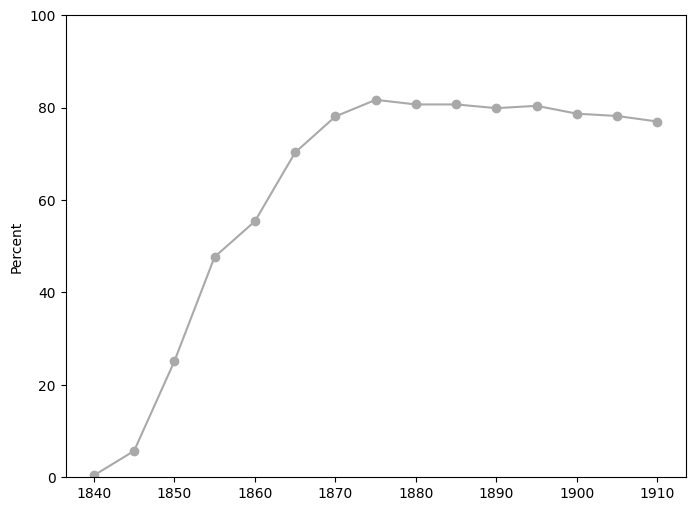

In [ ]:
plt.figure(figsize=(8, 6))

# Create the plot
plt.plot(rail_water['year'], rail_water['percent'], marker='o', linestyle='-', color='darkgray')
plt.ylim(0, 100)
#plt.title('Railway freight percent share in Prussian freight transport')
plt.ylabel('Percent')

# Save the figure
plt.savefig('trade.png', dpi=300)
files.download('trade.png')
# Show the plot
plt.show()

In [ ]:
upload = files.upload()
passenger = pd.read_csv('/content/passenger.csv', sep=';')

Saving passenger.csv to passenger.csv


In [ ]:
if "Preußen" in passenger.iloc[0]:
  passenger.columns = passenger.columns.str.replace("Preußen", "percent")

if "Gebiet" in passenger.iloc[0]:
  passenger.columns = passenger.columns.str.replace("Gebiet", "year")

passenger = passenger.astype(str)
passenger = passenger.applymap(lambda x: x.replace(',', '.'))
passenger = passenger.apply(pd.to_numeric, errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

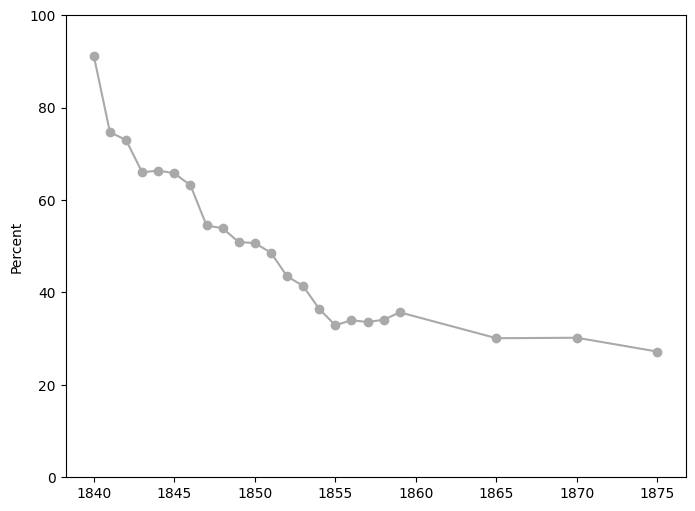

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(passenger['year'], passenger['percent'], marker='o', linestyle='-', color='darkgray')
plt.ylim(0, 100)
#plt.title('Passenger transport revenue as a percentage of total passenger and freight revenue')
plt.ylabel('Percent')
plt.savefig('revenue1.png', dpi=300)
files.download('revenue1.png')
plt.show()

In [ ]:
upload = files.upload()
annual_growth = pd.read_csv('/content/annual_growth.csv', sep=';')

Saving annual_growth.csv to annual_growth.csv


In [ ]:
annual_growth = annual_growth.astype(str)
annual_growth = annual_growth.applymap(lambda x: x.replace(',', '.'))

In [ ]:
annual_growth['start_year'] = annual_growth['Wachstumsrate'].str.split('-').str[0].astype(int)
annual_growth['end_year'] = annual_growth['Wachstumsrate'].str.split('-').str[1].astype(int)

In [ ]:
annual_growth['midpoint'] = (annual_growth['start_year'] + annual_growth['end_year']) / 2
annual_growth = annual_growth.apply(pd.to_numeric, errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

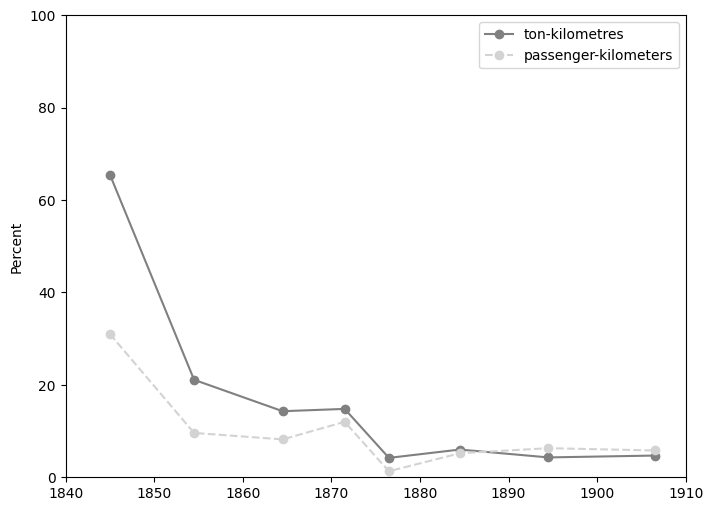

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(annual_growth['midpoint'], annual_growth['Tonnenkilometer'], marker='o', linestyle='-', color='gray', label='ton-kilometres')
plt.plot(annual_growth['midpoint'], annual_growth['Personenkilometer'], marker='o', linestyle='--', color='lightgray', label='passenger-kilometers')
plt.ylabel('Percent')
#plt.title('Average annual growth rates of the output of German railways')
custom_tick_labels = range(1840, 1911, 5)  # Generate labels from 1840 to 1910 at intervals of 5 years
plt.xlim(1840, 1910)
# Generate custom tick labels from 1840 to 1910 at intervals of 5 years
custom_tick_labels = range(1840, 1911, 10)
plt.xticks(custom_tick_labels)
plt.ylim(0, 100)
plt.legend()
plt.savefig('passenger1.png', dpi=300)
files.download('passenger1.png')
plt.show()

In [ ]:
upload = files.upload()
import_export = pd.read_csv('/content/import_export.csv', sep=';')

Saving import_export.csv to import_export.csv


In [ ]:
import_export = import_export.astype(str)
import_export = import_export.applymap(lambda x: x.replace(',', '.'))
import_export = import_export.apply(pd.to_numeric, errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

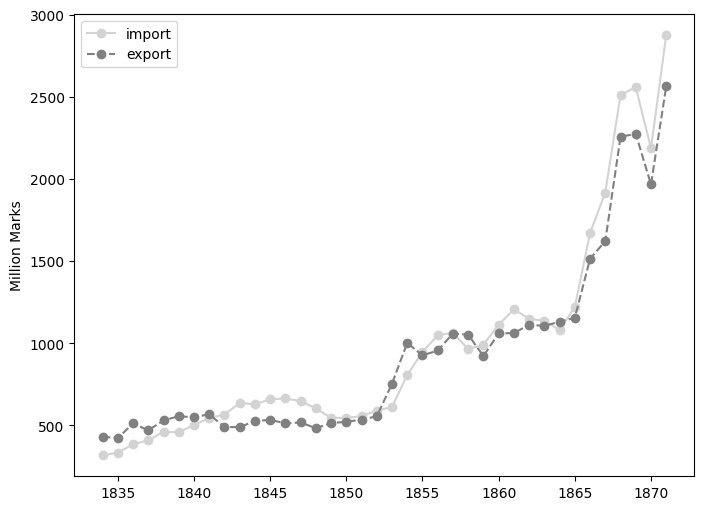

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(import_export['Variable'], import_export['Einfuhr'], marker='o', linestyle='-', color='lightgray', label='import')
plt.plot(import_export['Variable'], import_export['Ausfuhr'], marker='o', linestyle='--', color='gray', label='export')
plt.ylabel('Million Marks')
#plt.title('The average transport price per passenger or tonne-kilometer on German and Prussian railways')
plt.legend()
plt.savefig('import.png', dpi=300)
files.download('import.png')
plt.show()

In [ ]:
upload = files.upload()
transport_price = pd.read_csv('/content/transport_price.csv', sep=';')

Saving transport_price.csv to transport_price.csv


In [ ]:
transport_price = transport_price.astype(str)
transport_price = transport_price.applymap(lambda x: x.replace(',', '.'))
transport_price = transport_price.apply(pd.to_numeric, errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

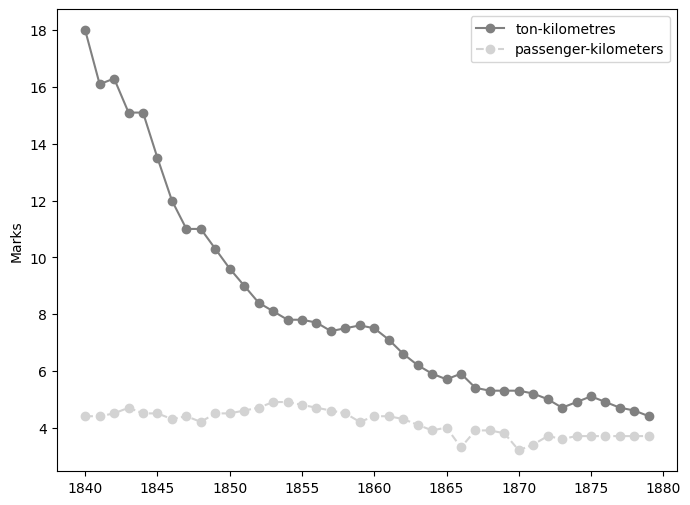

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(transport_price['Merkmal'], transport_price['Tonnenkilometer'], marker='o', linestyle='-', color='gray', label='ton-kilometres')
plt.plot(transport_price['Merkmal'], transport_price['Personenkilometer'], marker='o', linestyle='--', color='lightgray', label='passenger-kilometers')
plt.ylabel('Marks')
#plt.title('The average transport price per passenger or tonne-kilometer on German and Prussian railways')
plt.legend()
plt.savefig('price_passenger.png', dpi=300)
files.download('price_passenger.png')
plt.show()

In [ ]:
upload = files.upload()
revenue_railway = pd.read_csv('/content/revenue_railway.csv', sep=';')

Saving revenue_railway.csv to revenue_railway.csv


In [ ]:
revenue_railway = revenue_railway.astype(str)
revenue_railway = revenue_railway.applymap(lambda x: x.replace(',', '.'))
revenue_railway = revenue_railway.apply(pd.to_numeric, errors='coerce')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(revenue_railway['Variable'], revenue_railway['Güterverkehr (einschl. Viehtransport)'], marker='o', linestyle='-', color='lightgray', label='Freight')
plt.plot(revenue_railway['Variable'], revenue_railway['Personenverkehr'], marker='o', linestyle='-', color='darkgray', label='passenger')
plt.ylabel('Million Marks')
plt.title('Revenue from passenger and freight traffic on Prussian railways')
plt.legend()
plt.show()

In [ ]:
upload = files.upload()
investment = pd.read_csv('/content/investment.csv', sep=';')

Saving investment.csv to investment.csv


In [ ]:
investment = investment.astype(str)
investment = investment.applymap(lambda x: x.replace(',', '.'))
investment = investment.apply(pd.to_numeric, errors='coerce')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(investment['Gebiet'], investment['Preußen'], marker='o', linestyle='-', color='darkgray')
plt.ylabel('Million Marks')
plt.title('The net investments in current prices of German and Prussian railways')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

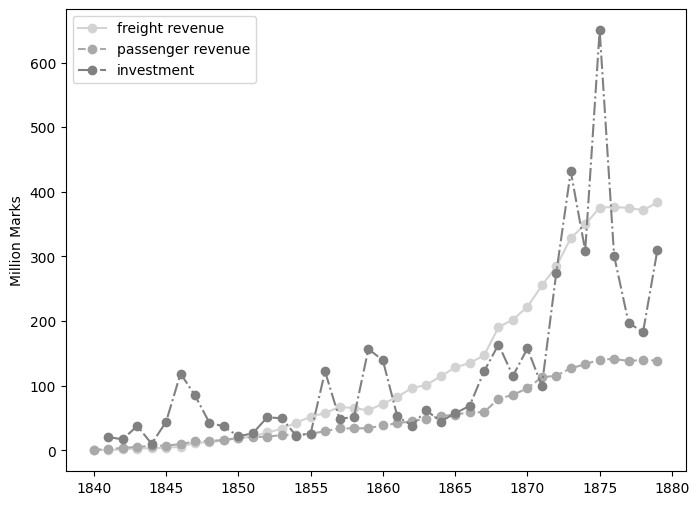

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(revenue_railway['Variable'], revenue_railway['Güterverkehr (einschl. Viehtransport)'], marker='o', linestyle='-', color='lightgray', label='freight revenue')
plt.plot(revenue_railway['Variable'], revenue_railway['Personenverkehr'], marker='o', linestyle='--', color='darkgray', label='passenger revenue')
plt.plot(investment['Gebiet'], investment['Preußen'], marker='o', linestyle='-.', color='gray', label='investment')
plt.ylabel('Million Marks')
#plt.title('Revenue from passenger and freight traffic on Prussian railways')
plt.legend()
plt.savefig('revenue_invest.png', dpi=300)
files.download('revenue_invest.png')
plt.show()

In [ ]:
upload = files.upload()
passenger_kilometers = pd.read_csv('/content/passenger_kilometers.csv', sep=';')

Saving passenger_kilometers.csv to passenger_kilometers.csv


In [ ]:
passenger_kilometers = passenger_kilometers.astype(str)
passenger_kilometers = passenger_kilometers.applymap(lambda x: x.replace(',', '.'))
passenger_kilometers = passenger_kilometers.apply(pd.to_numeric, errors='coerce')

In [ ]:
upload = files.upload()
ton_kilometers = pd.read_csv('/content/ton_kilometers.csv', sep=';')

Saving ton_kilometers.csv to ton_kilometers.csv


In [ ]:
ton_kilometers = ton_kilometers.astype(str)
ton_kilometers = ton_kilometers.applymap(lambda x: x.replace(',', '.'))
ton_kilometers = ton_kilometers.apply(pd.to_numeric, errors='coerce')

In [ ]:
ton_kilometers

Variable  Tonnenkilometer  Einnahmen  Transportpreis pro Tonnenkilometer
0       1880            13039      574.2                                 4.4
1       1881            13737      593.8                                 4.3
2       1882            15023      632.2                                 4.2
3       1883            15747      659.5                                 4.2
4       1884            16207      663.8                                 4.1
5       1885            15965      649.9                                 4.1
6       1886            16490      672.7                                 4.1
7       1887            18509      729.0                                 3.9
8       1888            20229      788.1                                 3.9
9       1889            21852      848.8                                 3.9
10      1890            22237      858.1                                 3.9
11      1891            23143      883.6                                 3.8
12      1892            23215      888.5                                 3.8
13      1893            24484      928.6                                 3.8
14      1894            24349      937.8                                 3.9
15      1895            25116      984.2                                 3.9
16      1896            26673     1041.8                                 3.9
17      1897            28560     1092.2                                 3.8
18      1898            30783     1162.0                                 3.8
19      1899            32986     1221.4                                 3.7
20      1900            34699     1271.2                                 3.7
21      1901            32989     1216.0                                 3.7
22      1902            34302     1261.7                                 3.7
23      1903            37034     1361.6                                 3.7
24      1904            38780     1429.0                                 3.7
25      1905            41936     1539.1                                 3.7
26      1906            45353     1656.6                                 3.7
27      1907            47906     1741.7                                 3.6
28      1908            45840     1677.6                                 3.7
29      1909            48576     1772.9                                 3.7
30      1910            51815     1903.1                                 3.7
31      1911            57093     2065.2                                 3.6
32      1912            60947     2181.6                                 3.6
33      1913            61744     2213.2                                 3.6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

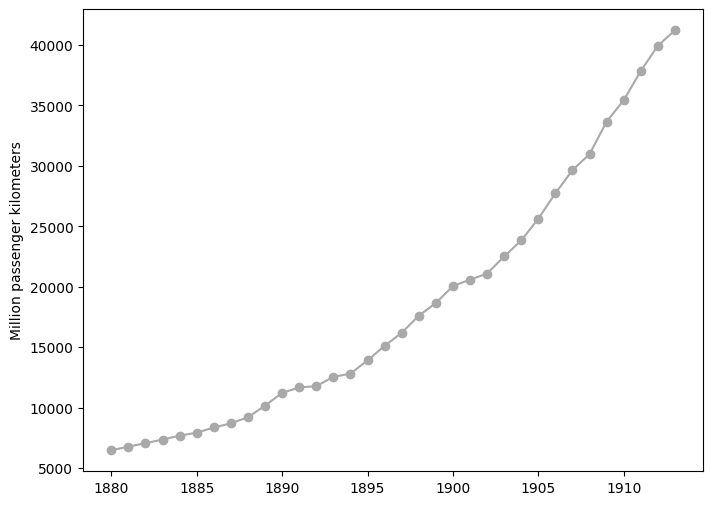

In [ ]:
plt.figure(figsize=(8, 6))

# Create the plot
plt.plot(passenger_kilometers['Variable'], passenger_kilometers['Personenkilometer'], marker='o', linestyle='-', color='darkgray')
#plt.title('Railway freight percent share in Prussian freight transport')
plt.ylabel('Million passenger kilometers')

plt.savefig('kilometers.png', dpi=300)
files.download('kilometers.png')
plt.show()

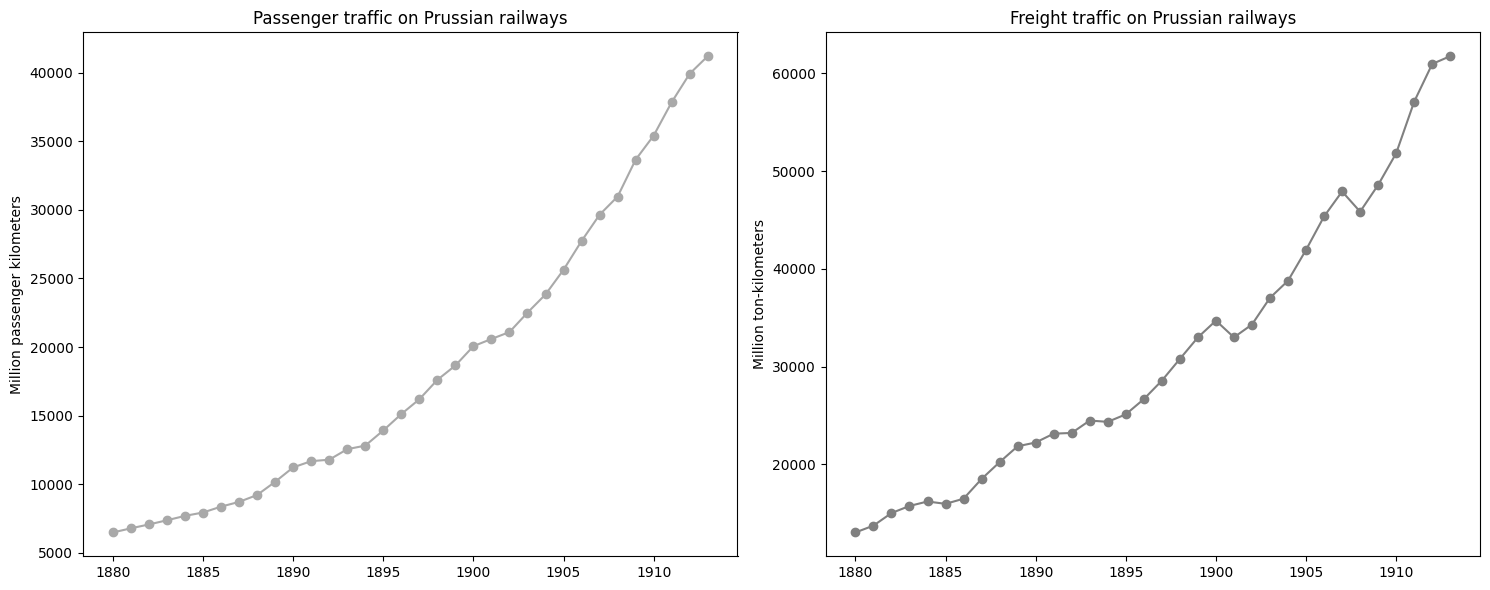

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(passenger_kilometers['Variable'], passenger_kilometers['Personenkilometer'], marker='o', linestyle='-', color='darkgray')
axes[0].set_ylabel('Million passenger kilometers')
axes[0].set_title('Passenger traffic on Prussian railways')

axes[1].plot(ton_kilometers['Variable'], ton_kilometers['Tonnenkilometer'], marker='o', linestyle='-', color='gray')
axes[1].set_ylabel('Million ton-kilometers')
axes[1].set_title('Freight traffic on Prussian railways')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the combined figure
plt.show()
fig.savefig('traffic.png', dpi=300)
files.download('traffic.png')

# Map section

In [ ]:
import io
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/German_Union (GER)_1870_v.1.0.shp'
map1 = gpd.read_file(shapefile_path)

Saving map_prussia_1870.zip to map_prussia_1870 (1).zip


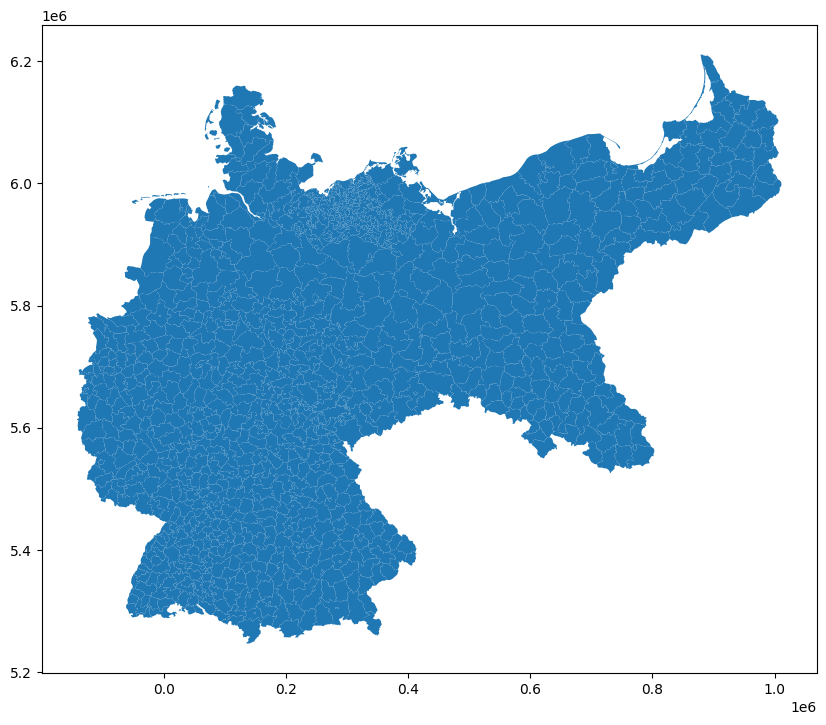

In [ ]:
map1.plot(figsize=(10, 10))
plt.show()

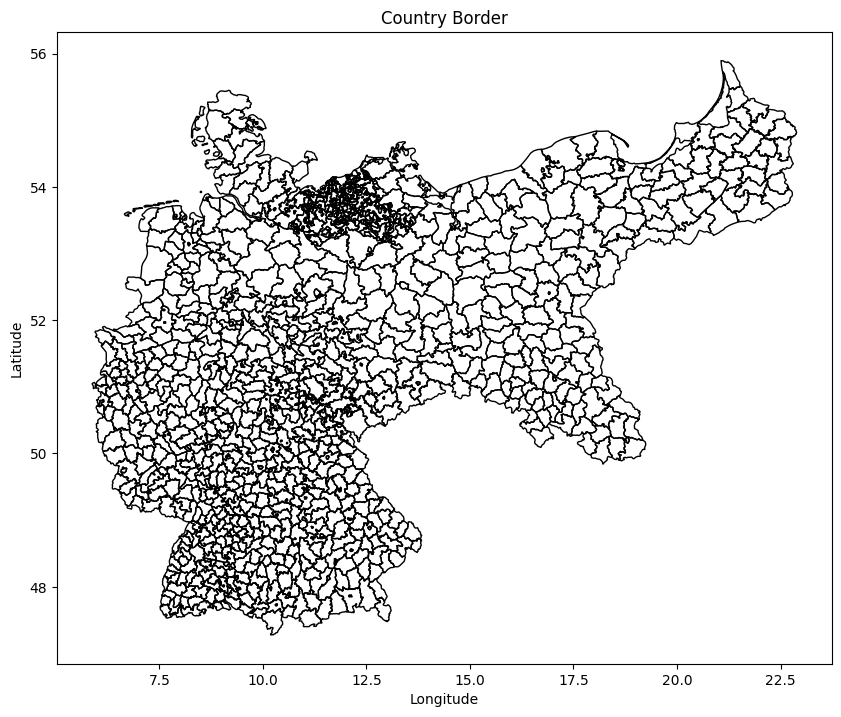

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming map1 is your GeoDataFrame
# Plot only the border without fill color
map1.plot(figsize=(10, 10), edgecolor='black', facecolor='none')  # Adjust the edgecolor as needed
plt.title('Country Border')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/railways.shp'
gdfRails = gpd.read_file(shapefile_path)

Saving railways.zip to railways.zip


In [ ]:
gdfRails['opening'] = gdfRails['opening'].fillna(0)
gdfRails['closing'] = gdfRails['closing'].fillna(9999)

In [ ]:
gdfRails

id  opening                comment   opening_d  loc_exact gauge  \
0    NaN   1852.0      Elbing-Braunsberg  19.10.1852        1.0   NaN   
1    NaN   1853.0  Braunsberg-Königsberg  02.08.1853        1.0   NaN   
2    NaN   1853.0  Braunsberg-Königsberg  02.08.1853        1.0   NaN   
3    NaN   1860.0  Königsberg-Eydtkuhnen  06.06.1860        1.0   NaN   
4    NaN   1860.0  Königsberg-Eydtkuhnen  06.06.1860        1.0   NaN   
...   ..      ...                    ...         ...        ...   ...   
4450 NaN   1909.0         Bötzow-Spandau  01.05.1909        1.0   NaN   
4451 NaN   1909.0         Bötzow-Spandau  01.05.1909        1.0   NaN   
4452 NaN   1909.0         Bötzow-Spandau  01.05.1909        1.0   NaN   
4453 NaN   1909.0         Bötzow-Spandau  01.05.1909        1.0   NaN   
4454 NaN   1909.0         Bötzow-Spandau  01.05.1909        1.0   NaN   

      closing                                           geometry  
0      2012.0  LINESTRING (19.84215 54.38095, 19.84324 54.378...  
1      1945.0  LINESTRING (19.93482 54.46413, 19.92202 54.458...  
2      9999.0  LINESTRING (20.49867 54.69327, 20.49274 54.695...  
3      9999.0  LINESTRING (21.06883 54.63585, 21.05758 54.634...  
4      9999.0  LINESTRING (21.21488 54.61492, 21.18584 54.617...  
...       ...                                                ...  
4450   1953.0  LINESTRING (13.16330 52.64120, 13.15243 52.648...  
4451   1953.0  LINESTRING (13.19582 52.61715, 13.19485 52.620...  
4452   1953.0  LINESTRING (13.19431 52.60988, 13.19582 52.61715)  
4453   1950.0  LINESTRING (13.19822 52.59786, 13.19427 52.606...  
4454   1950.0  LINESTRING (13.20472 52.58290, 13.20181 52.588...  

[4455 rows x 8 columns]

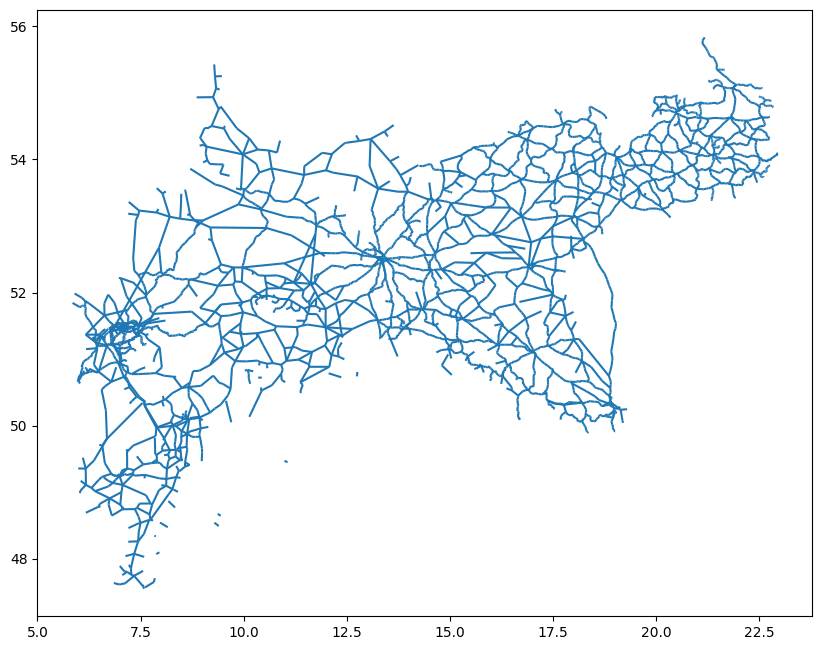

In [ ]:
gdfRails.plot(figsize=(10, 10))
plt.show()

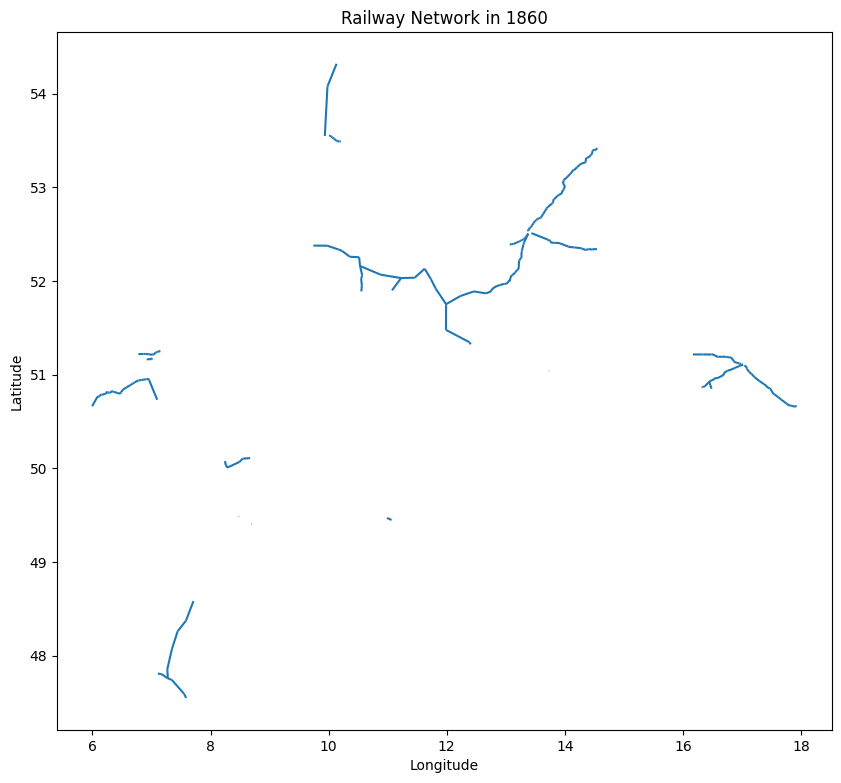

In [ ]:
year = 1845
filtered_gdf = gdfRails[(gdfRails['opening'] < year) & (gdfRails['closing'] > year)]

# Plot the filtered data
filtered_gdf.plot(figsize=(10, 10))
plt.title('Railway Network in 1860')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/stations.shp'
gdfStations = gpd.read_file(shapefile_path)

Saving stations.zip to stations.zip


In [ ]:
gdfStations['opening'] = gdfStations['opening'].fillna(0)
gdfStations['closing'] = gdfStations['closing'].fillna(9999)

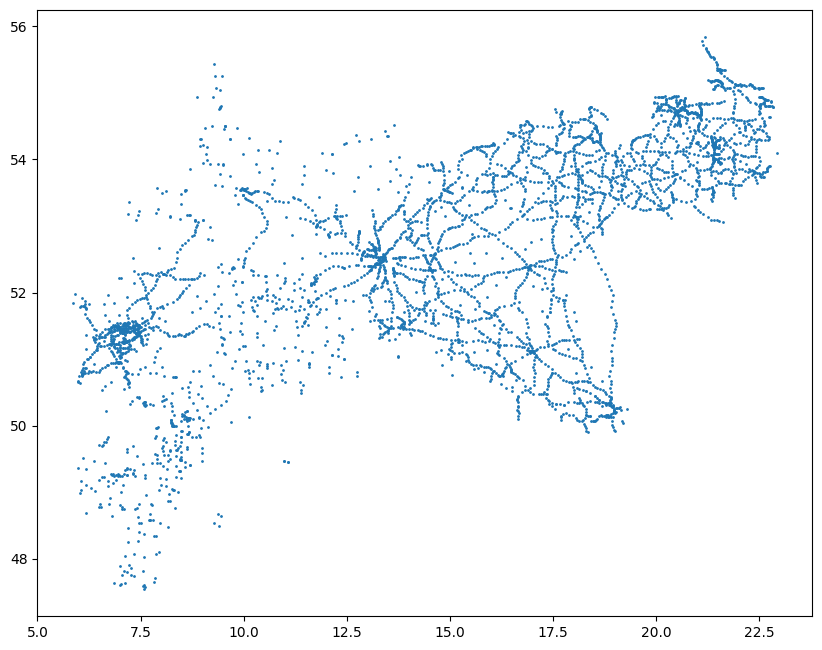

In [ ]:
gdfStations.plot(figsize=(10, 10), markersize=1)
plt.show()

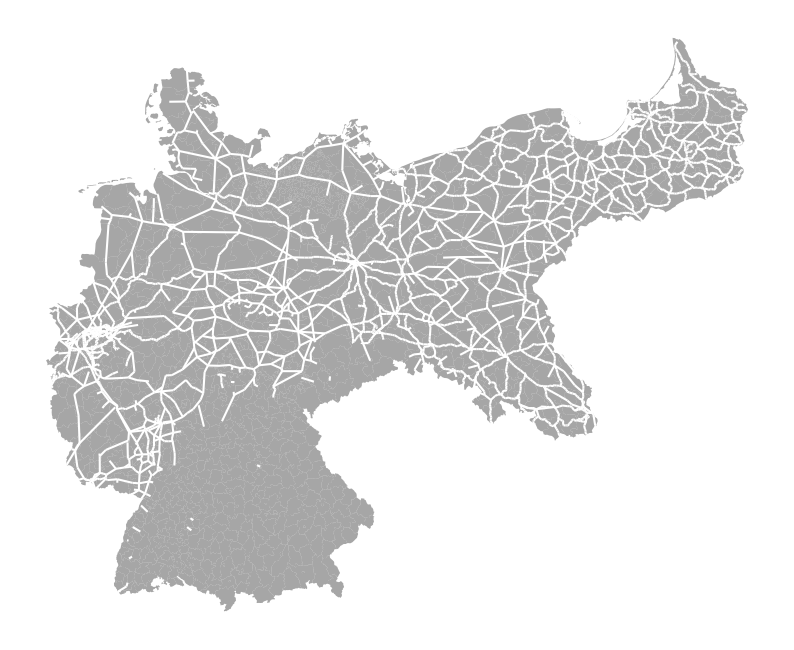

In [ ]:
# Create your GeoDataFrame gdfPlaces and map1
# ... (your code to create gdfPlaces and map1)

# Transform map1 to the CRS of gdfPlaces
map1 = map1.to_crs(gdfRails.crs)
#map1 = map1.to_crs(gdfStations.crs)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off')

# Plot map1 and gdfPlaces with pink color
map1.plot(ax=ax, alpha=0.7, color="gray")
#map1.plot(ax=ax, edgecolor='black', facecolor='none')  # Adjust the edgecolor as needed
gdfRails.plot(ax=ax, alpha=1, color="white", markersize=1)
#gdfStations.plot(ax=ax, alpha=0.7, color="black", markersize=1)




# Show the plot
plt.show()

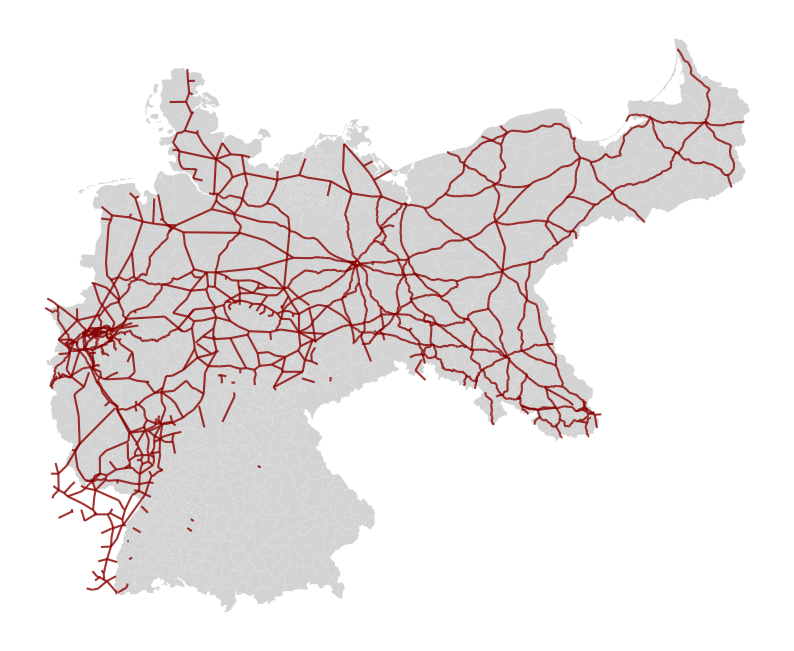

In [ ]:
year = 1880
filtered_gdf = gdfRails[(gdfRails['opening'] < year) & (gdfRails['closing'] > year)]

map1 = map1.to_crs(filtered_gdf.crs)
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
map1.plot(ax=ax, alpha=1, color="lightgray")
filtered_gdf.plot(ax=ax, alpha=0.8, color=(139/255, 0/255, 0/255), markersize=1)
plt.show()

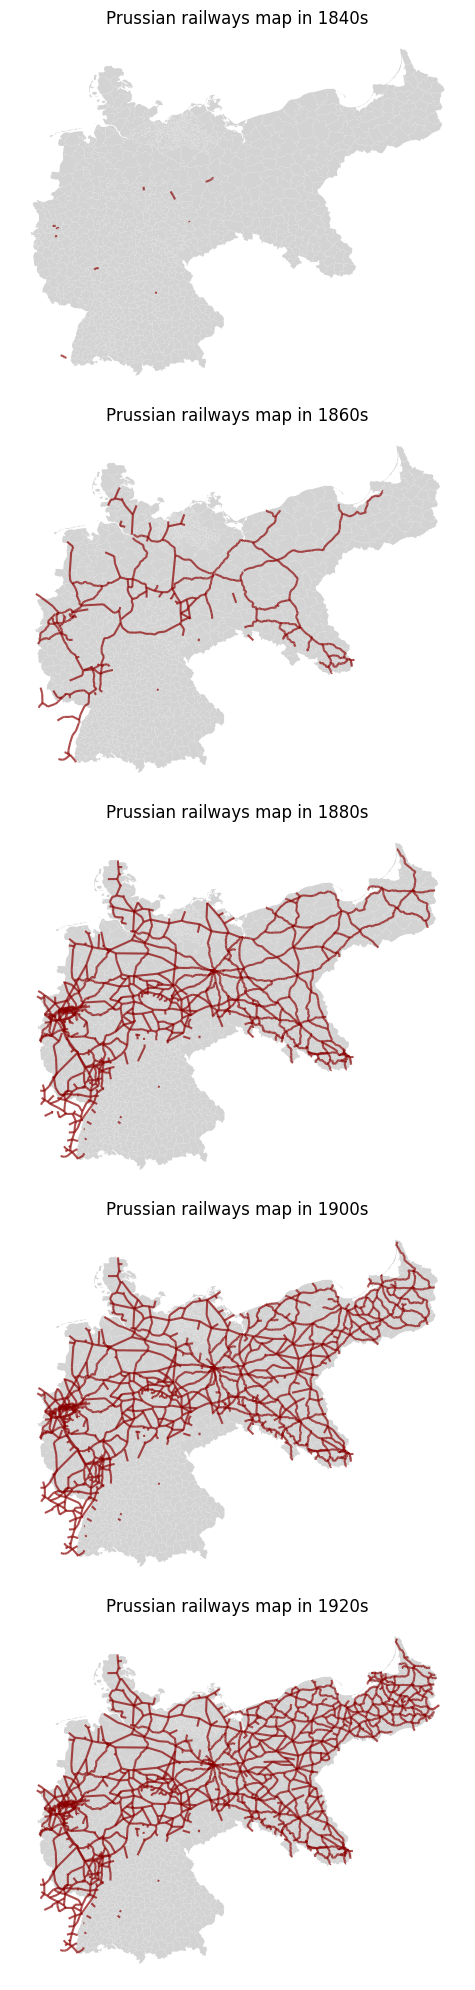

In [ ]:
years = [1840, 1860, 1880, 1900, 1920]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))

for idx, year in enumerate(years):
    filtered_gdf = gdfRails[(gdfRails['opening'] < year) & (gdfRails['closing'] > year)]

    map1_year = map1.to_crs(filtered_gdf.crs)

    ax = axes[idx]
    ax.axis('off')
    ax.set_title(f'Prussian railways map in {year}s')

    map1_year.plot(ax=ax, alpha=1, color="lightgray")
    filtered_gdf.plot(ax=ax, alpha=0.7, color=(139/255, 0/255, 0/255), markersize=1)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

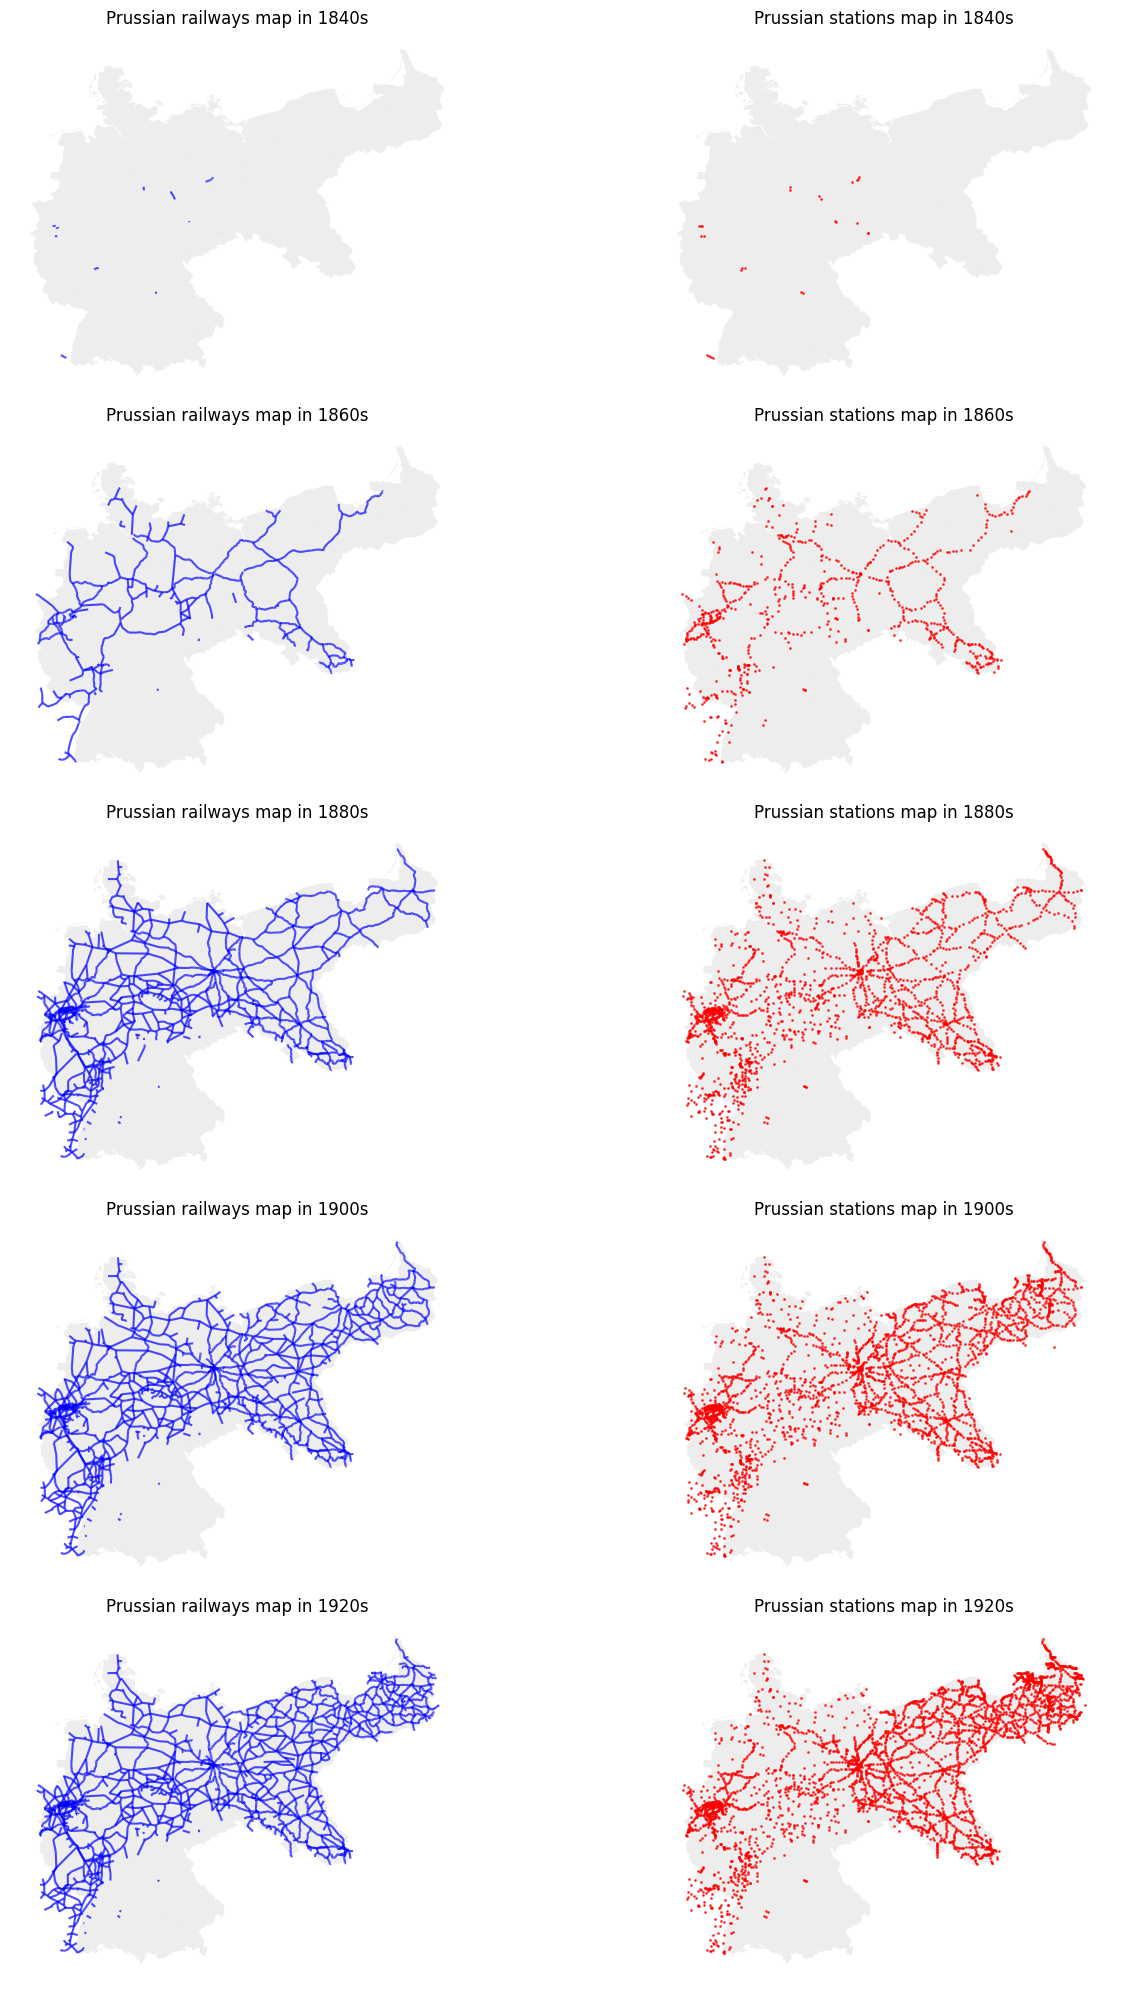

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdfRails and gdfStations are your GeoDataFrames
years = [1840, 1860, 1880, 1900, 1920]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for idx, year in enumerate(years):
    # Filtered railways data
    filtered_gdf_rails = gdfRails[(gdfRails['opening'] < year) & (gdfRails['closing'] > year)]

    # Filtered stations data
    filtered_gdf_stations = gdfStations[(gdfStations['opening'] < year) & (gdfStations['closing'] > year)]

    # Convert maps to same CRS
    map1_year = map1.to_crs(filtered_gdf_rails.crs)

    # Plot for railways
    ax_rails = axes[idx, 0]
    ax_rails.axis('off')
    ax_rails.set_title(f'Prussian railways map in {year}s')
    map1_year.plot(ax=ax_rails, alpha=0.4, color="lightgray")
    filtered_gdf_rails.plot(ax=ax_rails, alpha=0.7, color="blue", markersize=1)

    # Plot for stations
    ax_stations = axes[idx, 1]
    ax_stations.axis('off')
    ax_stations.set_title(f'Prussian stations map in {year}s')
    map1_year.plot(ax=ax_stations, alpha=0.4, color="lightgray")
    filtered_gdf_stations.plot(ax=ax_stations, alpha=0.7, color="red", markersize=1)

plt.tight_layout()
plt.savefig('rail_development.png', dpi=300)
files.download('rail_development.png')
plt.show()

In [ ]:
upload = files.upload()
settlements = pd.read_csv('/content/settlements.csv', sep=',')

Saving settlements.csv to settlements (1).csv


In [ ]:
settlements

id_unique        name               name_alt  \
0         8641      Berlin                    NaN   
1        38804      Aachen                    NaN   
2        38805     Alsdorf                    NaN   
3        38808      Broich  Broich (Broichweiden)   
4       38806a  Burtscheid                    NaN   
...        ...         ...                    ...   
1869     20258       Soden    Bad Soden am Taunus   
1870     20881     Usingen                    NaN   
1871     20374    Weilburg                    NaN   
1872     20965  Westerburg                    NaN   
1873     20065   Wiesbaden                    NaN   

                             def_comments    loc_1          loc_2      loc_3  \
0                                     NaN  Preußen         Berlin        NaN   
1                                     NaN  Preußen   Rheinprovinz     Aachen   
2                                     NaN  Preußen   Rheinprovinz     Aachen   
3                                     NaN  Preußen   Rheinprovinz     Aachen   
4     1.4.1897: Eingemeindung nach Aachen  Preußen   Rheinprovinz     Aachen   
...                                   ...      ...            ...        ...   
1869                                  NaN  Preußen  Hessen-Nassau  Wiesbaden   
1870                                  NaN  Preußen  Hessen-Nassau  Wiesbaden   
1871                                  NaN  Preußen  Hessen-Nassau  Wiesbaden   
1872                                  NaN  Preußen  Hessen-Nassau  Wiesbaden   
1873                                  NaN  Preußen  Hessen-Nassau  Wiesbaden   

              loc_4  loc_5      loc_x  ...  pop_1871 pop_1875  pop_1880  \
0               NaN    NaN  13.400000  ...  826341.0   966858   1122504   
1        Stadtkreis    NaN   6.084160  ...   74146.0    79606     85551   
2            Aachen    NaN   6.160000  ...    1752.0     2123      2494   
3            Aachen    NaN   6.164500  ...    2566.0     2567      2650   
4            Aachen    NaN   6.093330  ...   10081.0    10220     10989   
...             ...    ...        ...  ...       ...      ...       ...   
1869         Höchst    NaN   8.502094  ...    1287.0        .         .   
1870        Usingen    NaN   8.530000  ...    1798.0     1797      1902   
1871  Oberlahnkreis    NaN   8.270000  ...    2714.0     2834      3602   
1872     Westerburg    NaN   7.970000  ...    1418.0     1401      1272   
1873     Stadtkreis    NaN   8.240000  ...   35450.0    43674     50238   

      pop_1885  pop_1890  pop_1895 pop_1900   pop_1905   pop_1910 id_cantoni  
0      1315287   1578794   1677304  1888848  2040148.0  2071257.0     7010.0  
1        95725    103470    110551   135245   151971.0   156143.0    14001.0  
2         2683      2954      3307     3730     4916.0     6812.0    14003.0  
3         2784      2887      3057     3182     3287.0     5603.0        NaN  
4        12139     13388     15871        0        0.0        0.0    14002.0  
...        ...       ...       ...      ...        ...        ...        ...  
1869      1517         .       NaN        .     1917.0     2133.0    15129.0  
1870      1844      1875      1900     1890     1896.0     1987.0    15140.0  
1871      3697      3671      3643     3722     3828.0     4002.0    15148.0  
1872      1279      1215      1235     1285     1428.0     1425.0    18094.0  
1873     55454     64670     74133    86111   100953.0   109002.0    15151.0  

[1874 rows x 25 columns]

In [ ]:
unique_names_count = settlements['name'].nunique()
print(unique_names_count)

1861


In [ ]:
ton_kilometers = ton_kilometers.astype(str)
ton_kilometers = ton_kilometers.applymap(lambda x: x.replace(',', '.'))
ton_kilometers = ton_kilometers.apply(pd.to_numeric, errors='coerce')